### Identifies which of the three proposals you outlined in your lightning talk you have chosen - Fantasy Basketball 
### Articulates the main goal of your project - Predict a Profitable DraftKings Fantasy Basketball Lineup.
### Outlines your proposed methods and models - I have collected data from FantasyCruncher, RotoGuru and ESPN.  I will create several regression models (including Linear Regression and Logistical Regression).
### Defines the risks & assumptions of your data - The risks of my data is that it is from 2016-2017 and there may be retired players and rookies coming into the league. I also have LPSolve installed, but need to learn how to use it to solve the Knapsack problem of optimizing my lineup, while staying under the salary cap of 50,000  (https://en.wikipedia.org/wiki/Knapsack_problem) .
### Revises initial goals & success criteria, as needed - My assumptions are the same: Past performance, previous perfect lineup performers and defensive matchups will determine the highest scoring players on a daily basis.
### Performs & summarizes the EDA of your data - See below EDA and current DataFrame.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import re

# A data legend and other notes about this file can be found in rotoguru1.com/hoop/nba-dhd-2018-notes.txt


# Data obtained from RotoGuru for 2017-2018 Season for Fantasy Basketball Players.

# Data is separated by ':'

# Use delimiter=':' to separate into columns.

nba_2017 = pd.read_csv('DK_2017-2018.csv', delimiter=':')



In [31]:
# View the DataFrame

nba_2017.head()


,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos,Unnamed: 34
0,5153,"Mason III, Frank",Frank Mason III,20171120.0,sac,den,H,20171120-den-sac,22.0,98.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
1,5153,"Mason III, Frank",Frank Mason III,20171118.0,sac,por,A,20171118-sac-por,22.0,90.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
2,5153,"Mason III, Frank",Frank Mason III,20171117.0,sac,por,H,20171117-por-sac,22.0,86.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
3,5153,"Mason III, Frank",Frank Mason III,20171115.0,sac,atl,A,20171115-sac-atl,19.5,80.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN
4,5153,"Mason III, Frank",Frank Mason III,20171113.0,sac,was,A,20171113-sac-was,19.0,92.0,...,0.0,NaN,NaN,10.0,0.0,1.0,12.0,NaN,1.0,NaN


In [32]:
# See how many columns and rows in the DataFrame.

nba_2017.shape

(8383, 35)

In [33]:
# Locate a single game day to see if the columns are what you need.

nba_2017.loc[nba_2017['Date']== 20171117,:].sort_values('DKP', ascending=False)


,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,DK Change,DD Sal,DD Change,YH Sal,YH Change,FD pos,DK pos,DD pos,YH pos,Unnamed: 34
575,3541,"James, LeBron",LeBron James,20171117.0,cle,lac,H,20171117-lac-cle,19.5,118.0,...,300.0,NaN,NaN,56.0,0.0,3.0,34.0,NaN,3.0,NaN
5749,4440,"Walker, Kemba",Kemba Walker,20171117.0,cha,chi,A,20171117-cha-chi,20.0,120.0,...,500.0,NaN,NaN,39.0,0.0,1.0,1.0,NaN,1.0,NaN
1239,4107,"Jordan, DeAndre",DeAndre Jordan,20171117.0,lac,cle,A,20171117-lac-cle,19.5,113.0,...,100.0,NaN,NaN,28.0,-1.0,5.0,5.0,NaN,5.0,NaN
1746,4172,"Griffin, Blake",Blake Griffin,20171117.0,lac,cle,A,20171117-lac-cle,19.5,113.0,...,100.0,NaN,NaN,42.0,-3.0,4.0,45.0,NaN,4.0,NaN
1204,4627,"Oladipo, Victor",Victor Oladipo,20171117.0,ind,det,H,20171117-det-ind,19.0,107.0,...,500.0,NaN,NaN,33.0,0.0,2.0,12.0,NaN,2.0,NaN
780,3571,"Wade, Dwyane",Dwyane Wade,20171117.0,cle,lac,H,20171117-lac-cle,19.5,118.0,...,-100.0,NaN,NaN,19.0,0.0,2.0,12.0,NaN,2.0,NaN
1980,4760,"Dinwiddie, Spencer",Spencer Dinwiddie,20171117.0,bkn,uta,H,20171117-uta-bkn,19.5,118.0,...,700.0,NaN,NaN,13.0,2.0,1.0,12.0,NaN,1.0,NaN
3525,4494,"Beal, Bradley",Bradley Beal,20171117.0,was,mia,H,20171117-mia-was,19.0,88.0,...,300.0,NaN,NaN,37.0,0.0,2.0,2.0,NaN,2.0,NaN
6851,3891,"Lowry, Kyle",Kyle Lowry,20171117.0,tor,nyk,H,20171117-nyk-tor,19.5,107.0,...,400.0,NaN,NaN,32.0,0.0,1.0,1.0,NaN,1.0,NaN
5183,4324,"Whiteside, Hassan",Hassan Whiteside,20171117.0,mia,was,A,20171117-mia-was,19.0,91.0,...,400.0,NaN,NaN,39.0,0.0,5.0,5.0,NaN,5.0,NaN


In [34]:
# Import the 2016-2017 DraftKings perfect lineups from https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/

# Read it as a DataFrame

# Assign it to "perfectlineup"

perfectlineup = pd.read_csv('NBA 2017-2018.csv')

In [35]:
# View "perfectlineup"
perfectlineup['PG'] = perfectlineup['PG'].replace('[(0)]', '',regex=True)
perfectlineup['SG'] = perfectlineup['SG'].replace('[(0)]', '',regex=True)
perfectlineup['SF'] = perfectlineup['SF'].replace('[(0)]', '',regex=True)
perfectlineup['PF'] = perfectlineup['PF'].replace('[(0)]', '',regex=True)
perfectlineup['C'] = perfectlineup['C'].replace('[(0)]', '',regex=True)
perfectlineup['G'] = perfectlineup['G'].replace('[(0)]', '',regex=True)
perfectlineup['F'] = perfectlineup['F'].replace('[(0)]', '',regex=True)
perfectlineup['UTIL'] = perfectlineup['UTIL'].replace('[(0)]', '',regex=True)

perfectlineup = perfectlineup.replace('\s+$', '',regex=True)

perfectlineup['Date'] = pd.to_datetime(perfectlineup.Date)
perfectlineup.sort_values('Date')

perfectlineup


,Date,PG,SG,SF,PF,C,G,F,UTIL
0,2017-10-17,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
1,2017-10-18,Darren Collison,Dillon Brooks,Tobias Harris,Thaddeus Young,Hassan Whiteside,Giannis Antetokounmpo,Robert Covington,Clint Capela
2,2017-10-19,Russell Westbrook,C.J. Miles,Larry Nance Jr.,Kristaps Porzingis,Jonas Valanciunas,Delon Wright,Blake Griffin,Robin Lopez
3,2017-10-20,Spencer Dinwiddie,Evan Fournier,Otto Porter,Al-Farouq Aminu,Nikola Vucevic,Lonzo Ball,Anthony Davis,T.J. Warren
4,2017-10-21,Victor Oladipo,D.J. Augustin,Giannis Antetokounmpo,James Johnson,Marc Gasol,Iman Shumpert,Kevin Durant,Domantas Sabonis
5,2017-10-22,D'Angelo Russell,Jordan Clarkson,Caris LeVert,John Collins,Steven Adams,Jeff Teague,Andrew Wiggins,Anthony Davis
6,2017-10-23,Dejounte Murray,Eric Gordon,Ben Simmons,Otto Porter,Dwight Howard,Danny Green,Giannis Antetokounmpo,Mike James
7,2017-10-24,Cory Joseph,Evan Fournier,LeBron James,Aaron Gordon,DeMarcus Cousins,Darren Collison,Thabo Sefolosha,Jamal Crawford
8,2017-10-25,T.J. McConnell,Spencer Dinwiddie,Tobias Harris,Jeff Green,Clint Capela,Russell Westbrook,LeBron James,Brandon Ingram
9,2017-10-26,Giannis Antetokounmpo,Denzel Valentine,Al-Farouq Aminu,Al Horford,Mike Muscala,Jameer Nelson,Jarell Martin,DeMarcus Cousins


In [36]:
perfectlineup['Date'].unique()


array(['2017-10-17T00:00:00.000000000', '2017-10-18T00:00:00.000000000',
       '2017-10-19T00:00:00.000000000', '2017-10-20T00:00:00.000000000',
       '2017-10-21T00:00:00.000000000', '2017-10-22T00:00:00.000000000',
       '2017-10-23T00:00:00.000000000', '2017-10-24T00:00:00.000000000',
       '2017-10-25T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2017-10-27T00:00:00.000000000', '2017-10-28T00:00:00.000000000',
       '2017-10-29T00:00:00.000000000', '2017-10-30T00:00:00.000000000',
       '2017-10-31T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-11-02T00:00:00.000000000', '2017-11-03T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2017-11-05T00:00:00.000000000',
       '2017-11-06T00:00:00.000000000', '2017-11-07T00:00:00.000000000',
       '2017-11-08T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-10T00:00:00.000000000', '2017-11-11T00:00:00.000000000',
       '2017-11-12T00:00:00.000000000', '2017-11-13

In [37]:
# Perform value counts for the Point Guard position.

perfectlineup['PG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

James Harden             5
Donovan Mitchell         2
Jeff Teague              2
Kyrie Irving             2
Cory Joseph              2
D'Angelo Russell         2
Stephen Curry            2
Russell Westbrook        2
Damian Lillard           1
C.J. McCollum            1
Jrue Holiday             1
Kyle Lowry               1
Darren Collison          1
Dejounte Murray          1
Dennis Smith Jr.         1
Jameer Nelson            1
Giannis Antetokounmpo    1
Dwyane Wade              1
Elfrid Payton            1
Jordan Clarkson          1
Kemba Walker             1
Victor Oladipo           1
Spencer Dinwiddie        1
T.J. McConnell           1
Name: PG, dtype: int64

In [38]:
# Perform value counts for the Shooting Guard position.

perfectlineup['SG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Spencer Dinwiddie    3
Tim Hardaway Jr.     2
Devin Booker         2
Evan Fournier        2
Rodney Hood          2
C.J. Miles           1
Tyreke Evans         1
Eric Gordon          1
Troy Daniels         1
Dillon Brooks        1
Dion Waiters         1
Kelly Oubre Jr.      1
Kent Bazemore        1
Khris Middleton      1
D.J. Augustin        1
Allen Crabbe         1
Victor Oladipo       1
Justin Holiday       1
Jrue Holiday         1
Austin Rivers        1
Kyle Anderson        1
Denzel Valentine     1
Jaylen Brown         1
Luke Kennard         1
Nick Young           1
Marco Belinelli      1
Jordan Clarkson      1
J.J. Redick          1
Dwyane Wade          1
Name: SG, dtype: int64

In [39]:
# Perform value counts for the Small Forward position.

perfectlineup['SF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

LeBron James             3
Khris Middleton          2
Will Barton              2
Giannis Antetokounmpo    2
T.J. Warren              2
Tobias Harris            2
Kent Bazemore            2
Kyle Kuzma               1
Wayne Ellington          1
Taurean Prince           1
Al-Farouq Aminu          1
Tyreke Evans             1
DeMar DeRozan            1
Kevin Durant             1
Harrison Barnes          1
Trevor Ariza             1
Larry Nance Jr.          1
Evan Fournier            1
Ben Simmons              1
Caris LeVert             1
Otto Porter              1
Marcus Smart             1
Bojan Bogdanovic         1
Wesley Matthews          1
Jaylen Brown             1
Chandler Parsons         1
Luc Mbah a Moute         1
Name: SF, dtype: int64

In [40]:
# Perform value counts for the Power Forward position.

perfectlineup['PF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Jayson Tatum          2
Derrick Favors        2
Otto Porter           2
Kevin Love            1
Gorgui Dieng          1
Aaron Gordon          1
Domantas Sabonis      1
Jeff Green            1
Julius Randle         1
James Johnson         1
Kyle O'Quinn          1
Taj Gibson            1
Al-Farouq Aminu       1
Harrison Barnes       1
Wesley Johnson        1
Larry Nance Jr.       1
Kristaps Porzingis    1
Greg Monroe           1
T.J. Warren           1
Al Horford            1
LaMarcus Aldridge     1
Noah Vonleh           1
Jerami Grant          1
Serge Ibaka           1
Alex Len              1
Enes Kanter           1
DeMarcus Cousins      1
John Collins          1
LeBron James          1
Lauri Markkanen       1
Dirk Nowitzki         1
Thaddeus Young        1
Name: PF, dtype: int64

In [41]:
perfectlineup['G'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Jimmy Butler             2
Kyle Lowry               2
Lonzo Ball               2
Jeff Teague              2
Ben Simmons              1
Spencer Dinwiddie        1
Delon Wright             1
Jerian Grant             1
Jameer Nelson            1
D'Angelo Russell         1
James Harden             1
Kemba Walker             1
Mike James               1
Khris Middleton          1
Emmanuel Mudiay          1
Jeremy Lamb              1
Russell Westbrook        1
Goran Dragic             1
Louis Williams           1
Donovan Mitchell         1
Giannis Antetokounmpo    1
Iman Shumpert            1
Kyrie Irving             1
Darren Collison          1
Stephen Curry            1
Klay Thompson            1
Raymond Felton           1
Yogi Ferrell             1
Danny Green              1
Chris Paul               1
Dennis Smith Jr.         1
Name: G, dtype: int64

In [42]:
# Perform value counts for the Forward position.

perfectlineup['F'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Brandon Ingram           2
Thabo Sefolosha          2
Devin Booker             2
Robert Covington         2
Kevin Durant             2
Draymond Green           1
LeBron James             1
Wesley Matthews          1
Jarell Martin            1
Jeff Green               1
Julius Randle            1
Anthony Davis            1
James Johnson            1
Paul George              1
Andrew Wiggins           1
C.J. Miles               1
Josh Richardson          1
Kyle Kuzma               1
Paul Millsap             1
Marcus Smart             1
Jonathon Simmons         1
Giannis Antetokounmpo    1
P.J. Tucker              1
Blake Griffin            1
Lucas Nogueira           1
Dario Saric              1
Alex Len                 1
Bobby Portis             1
Marquese Chriss          1
Tim Hardaway Jr.         1
Name: F, dtype: int64

In [43]:
# Perform value counts for the Center position.

perfectlineup['C'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Andre Drummond        4
Dwight Howard         3
Marc Gasol            2
Jusuf Nurkic          2
Ryan Anderson         2
DeMarcus Cousins      2
Clint Capela          2
Karl-Anthony Towns    1
Jonas Valanciunas     1
Kevin Love            1
Domantas Sabonis      1
Mike Muscala          1
LaMarcus Aldridge     1
Kristaps Porzingis    1
Draymond Green        1
Paul Millsap          1
DeAndre Jordan        1
Steven Adams          1
Myles Turner          1
Dewayne Dedmon        1
Nikola Vucevic        1
Hassan Whiteside      1
Nikola Jokic          1
Joel Embiid           1
Salah Mejri           1
Name: C, dtype: int64

In [44]:
# Perform value counts for the Utility position.

perfectlineup['UTIL'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Damian Lillard         2
Nikola Jokic           2
Brook Lopez            2
Louis Williams         1
Nick Young             1
Brandon Ingram         1
Jamal Crawford         1
Paul George            1
Rudy Gobert            1
Willie Cauley-Stein    1
Lonzo Ball             1
Reggie Jackson         1
Hassan Whiteside       1
Joel Embiid            1
Karl-Anthony Towns     1
Robin Lopez            1
Josh Jackson           1
Mike James             1
Domantas Sabonis       1
Al Horford             1
Clint Capela           1
T.J. Warren            1
John Henson            1
Robert Covington       1
Anthony Davis          1
Pascal Siakam          1
Jusuf Nurkic           1
Kris Dunn              1
DeMarcus Cousins       1
Dirk Nowitzki          1
Patrick Mills          1
Kristaps Porzingis     1
Name: UTIL, dtype: int64

In [45]:
# Import the 2016-2017 Defensive Real Plus Minus from http://www.espn.com/nba/statistics/rpm/_/year/2017/sort/DRPM

# Read it as a DataFrame

# Assign it to "drpm"

drpm = pd.read_csv('drpm.csv', delimiter=',')

In [46]:
# print the head

drpm.head()

,RK,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,1,Rudy Gobert,UTAH,81,33.9,0.35,6.02,6.37,15.55
1,2,Draymond Green,GS,76,32.5,1.55,5.59,7.14,16.84
2,3,Andrew Bogut,CLE/DAL,27,21.6,-4.01,4.34,0.33,1.20
3,4,Robert Covington,PHI,67,31.6,-0.77,4.32,3.55,9.23
4,5,Dewayne Dedmon,SA,76,17.5,-1.63,3.94,2.31,4.49


In [47]:
# Revise the nba_2017 to only include the data you need.

# Reassign it to "nba_2017_revised"

nba_2017_revised = nba_2017[['Date', 'First  Last', 'Stats', 'Minutes', 'DKP', 'Team', 'Opp']]

In [48]:
# View "nba_2017_revised"

nba_2017_revised

# ['Stats'] needs to be stripped.

,Date,First Last,Stats,Minutes,DKP,Team,Opp
0,20171120.0,Frank Mason III,11pt 3rb 6as 1st 2to 1trey 5-7fg,21.183333,25.25,sac,den
1,20171118.0,Frank Mason III,13pt 2rb 2as 3to 1trey 5-10fg 2-3ft,19.533333,17.50,sac,por
2,20171117.0,Frank Mason III,4pt 3rb 3as 1-6fg 2-2ft,21.450000,12.25,sac,por
3,20171115.0,Frank Mason III,2pt 1rb 1as 1to 0-2fg 2-2ft,9.516667,4.25,sac,atl
4,20171113.0,Frank Mason III,NaN,0.000000,0.00,sac,was
5,20171111.0,Frank Mason III,6pt 2as 1st 1to 1trey 1-2fg 3-4ft,12.033333,11.00,sac,nyk
6,20171109.0,Frank Mason III,NaN,0.000000,0.00,sac,phi
7,20171107.0,Frank Mason III,NaN,0.000000,0.00,sac,okc
8,20171104.0,Frank Mason III,7pt 1rb 6as 3to 3-9fg 1-2ft,21.150000,15.75,sac,det
9,20171101.0,Frank Mason III,0pt 3as 1to 0-3fg,6.983333,4.00,sac,bos


In [49]:
# Locate a single day and sort by DKP (DraftKing Points) and sanity check the amounts.

nba_2017_revised.loc[nba_2017_revised['Date']== 20171117.0,:].sort_values('DKP', ascending=False)

,Date,First Last,Stats,Minutes,DKP,Team,Opp
575,20171117.0,LeBron James,39pt 14rb 6as 1st 6to 4trey 17-26fg 1-5ft,46.133333,68.00,cle,lac
5749,20171117.0,Kemba Walker,47pt 6rb 5as 1to 5trey 17-27fg 8-9ft,38.083333,64.00,cha,chi
1239,20171117.0,DeAndre Jordan,20pt 22rb 1as 1st 3bl 4to 10-12fg 0-2ft,40.150000,56.50,lac,cle
1746,20171117.0,Blake Griffin,23pt 12rb 5as 2st 1bl 1to 2trey 8-25fg 5-6ft,42.033333,53.50,lac,cle
1204,20171117.0,Victor Oladipo,21pt 15rb 4as 1st 1bl 4to 5trey 6-19fg 4-7ft,39.133333,51.75,ind,det
780,20171117.0,Dwyane Wade,23pt 11rb 5as 1st 2bl 2to 6-16fg 11-13ft,36.816667,50.75,cle,lac
1980,20171117.0,Spencer Dinwiddie,25pt 5rb 8as 2st 6trey 9-14fg 1-1ft,31.483333,50.25,bkn,uta
3525,20171117.0,Bradley Beal,26pt 10rb 4as 1st 1to 5trey 9-22fg 3-4ft,39.533333,50.00,was,mia
6851,20171117.0,Kyle Lowry,22pt 8rb 10as 2to 5trey 8-12fg 1-1ft,31.966667,50.00,tor,nyk
5183,20171117.0,Hassan Whiteside,22pt 16rb 1as 2bl 2to 10-12fg 2-3ft,31.133333,48.00,mia,was


In [50]:
# Left Merge nba_2017_revised and drpm.

# Reassign to "nba_2017_revised2"

nba_2017_2=pd.merge(nba_2017,drpm,left_on='First  Last',right_on='NAME')

In [51]:
# View "nba_2017_revised2"

nba_2017_2

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,Unnamed: 34,RK,NAME,TEAM,GP_y,MPG,ORPM,DRPM,RPM,WINS
0,5006,"Baker, Ron",Ron Baker,20171120.0,nyk,lac,H,20171120-lac-nyk,19.5,107.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
1,5006,"Baker, Ron",Ron Baker,20171117.0,nyk,tor,A,20171117-nyk-tor,19.5,84.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
2,5006,"Baker, Ron",Ron Baker,20171115.0,nyk,uta,H,20171115-uta-nyk,19.5,106.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
3,5006,"Baker, Ron",Ron Baker,20171113.0,nyk,cle,H,20171113-cle-nyk,19.5,101.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
4,5006,"Baker, Ron",Ron Baker,20171111.0,nyk,sac,H,20171111-sac-nyk,20.0,118.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
5,5006,"Baker, Ron",Ron Baker,20171108.0,nyk,orl,A,20171108-nyk-orl,19.0,99.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
6,5006,"Baker, Ron",Ron Baker,20171107.0,nyk,cha,H,20171107-cha-nyk,19.5,118.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
7,5006,"Baker, Ron",Ron Baker,20171105.0,nyk,ind,H,20171105-ind-nyk,19.5,108.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
8,5006,"Baker, Ron",Ron Baker,20171103.0,nyk,pho,H,20171103-pho-nyk,19.5,120.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06
9,5006,"Baker, Ron",Ron Baker,20171101.0,nyk,hou,H,20171101-hou-nyk,20.0,97.0,...,NaN,298,Ron Baker,NY,52,16.5,-2.68,-0.56,-3.24,-0.06


In [52]:
# Select a single game day and view the columns.

# reassign to "nba2017loc"

nba2017loc = nba_2017.loc[nba_2017['Date']== 20161117.0,:].sort_values('DKP', ascending=False)
nba2017loc.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes', 'GP',
       'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD', 'TripleD',
       'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal', 'DD Change',
       'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos', 'YH pos',
       'Unnamed: 34'],
      dtype='object')

In [53]:
# Setup columns in the order I would like to see them in. Stats still needs to be stripped.

nba2017loc[['First  Last', 'Date', 'DK Sal', 'Team', 'Opp', 'Start', 'H/A', 'Minutes', 'DKP', 'Stats', 'DoubleD', 'TripleD', 'DK pos']]

,First Last,Date,DK Sal,Team,Opp,Start,H/A,Minutes,DKP,Stats,DoubleD,TripleD,DK pos


In [54]:
# Import re

import re

# Strip out "Stats" and assign each individual stat to its own column.

pat = lambda x: re.match('^(.+?)([a-z]+)$', x).groups()
prs = lambda s: pd.Series(*zip(*[pat(x) for x in s.split()]))

# Reassign to nba2017strip

nba2017strip = nba_2017_2.drop('Stats', 1).join(nba_2017_2.Stats.fillna('').apply(prs))

# View "nba2017strip"

nba2017strip

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,WINS,as,bl,fg,ft,pt,rb,st,to,trey
0,5006,"Baker, Ron",Ron Baker,20171120.0,nyk,lac,H,20171120-lac-nyk,19.5,107.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5006,"Baker, Ron",Ron Baker,20171117.0,nyk,tor,A,20171117-nyk-tor,19.5,84.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5006,"Baker, Ron",Ron Baker,20171115.0,nyk,uta,H,20171115-uta-nyk,19.5,106.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5006,"Baker, Ron",Ron Baker,20171113.0,nyk,cle,H,20171113-cle-nyk,19.5,101.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5006,"Baker, Ron",Ron Baker,20171111.0,nyk,sac,H,20171111-sac-nyk,20.0,118.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5006,"Baker, Ron",Ron Baker,20171108.0,nyk,orl,A,20171108-nyk-orl,19.0,99.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5006,"Baker, Ron",Ron Baker,20171107.0,nyk,cha,H,20171107-cha-nyk,19.5,118.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5006,"Baker, Ron",Ron Baker,20171105.0,nyk,ind,H,20171105-ind-nyk,19.5,108.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5006,"Baker, Ron",Ron Baker,20171103.0,nyk,pho,H,20171103-pho-nyk,19.5,120.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5006,"Baker, Ron",Ron Baker,20171101.0,nyk,hou,H,20171101-hou-nyk,20.0,97.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
nba2017strip.dtypes

GID             object
Last, First     object
First  Last     object
Date           float64
Team            object
Opp             object
H/A             object
GameID          object
GTime(ET)      float64
Team pts       float64
Opp pts        float64
Start          float64
Minutes        float64
GP_x           float64
active         float64
FDP            float64
DKP            float64
DDP            float64
YHP            float64
DoubleD        float64
TripleD        float64
FD Sal         float64
FD Change      float64
DK Sal         float64
DK Change      float64
DD Sal         float64
DD Change      float64
YH Sal         float64
YH Change      float64
FD pos         float64
DK pos         float64
DD pos         float64
YH pos         float64
Unnamed: 34    float64
RK               int64
NAME            object
TEAM            object
GP_y             int64
MPG            float64
ORPM           float64
DRPM           float64
RPM            float64
WINS           float64
as         

In [56]:
# Fill in NA's with 0's.

nba2017strip = nba2017strip.fillna(0)

In [57]:
nba2017strip['as'] = nba2017strip['as'].astype(int)
nba2017strip['bl'] = nba2017strip['bl'].astype(int)

nba2017strip['pt'] = nba2017strip['pt'].astype(int)
nba2017strip['rb'] = nba2017strip['rb'].astype(int)
nba2017strip['st'] = nba2017strip['st'].astype(int)
nba2017strip['to'] = nba2017strip['to'].astype(int)
nba2017strip['trey'] = nba2017strip['trey'].astype(int)

nba2017strip['GID'] = nba2017strip['GID'].astype(str)

In [58]:
# nba2017strip['fta'] = nba2017strip['ft'].apply(lambda x: 'ft' if '-' in x else x)

In [59]:
nba2017strip[['ftm', 'fta']] = nba2017strip['ft'].str.extract('(\d+)-(\d+)', expand=True)
nba2017strip[['fgm', 'fga']] = nba2017strip['fg'].str.extract('(\d+)-(\d+)', expand=True)


In [60]:
nba2017strip['Date'] = pd.to_datetime(nba2017strip['Date'], format='%Y%m%d', errors='ignore')

In [61]:
nba2017strip['Date'] = pd.to_datetime(nba2017strip.Date)
nba2017strip.sort_values('Date')

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,ft,pt,rb,st,to,trey,ftm,fta,fgm,fga
1382,4407,"Morris, Marcus",Marcus Morris,2017-10-17,bos,cle,A,20171017-bos-cle,20.0,99.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
586,4397,"Shumpert, Iman",Iman Shumpert,2017-10-17,cle,bos,H,20171017-bos-cle,20.0,102.0,...,0,4,2,1,1,0,NaN,NaN,2,3
4303,3408,"Hilario, Nene",Nene Hilario,2017-10-17,hou,gsw,A,20171017-hou-gsw,22.5,122.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
603,3992,"Green, Jeff",Jeff Green,2017-10-17,cle,bos,H,20171017-bos-cle,20.0,102.0,...,0,6,0,0,1,0,NaN,NaN,3,8
5603,5017,"Brown, Jaylen",Jaylen Brown,2017-10-17,bos,cle,A,20171017-bos-cle,20.0,99.0,...,1-2,25,6,2,3,2,1,2,11,23
668,3786,"Paul, Chris",Chris Paul,2017-10-17,hou,gsw,A,20171017-hou-gsw,22.5,122.0,...,0,4,8,2,1,0,NaN,NaN,2,9
33,4379,"Irving, Kyrie",Kyrie Irving,2017-10-17,bos,cle,A,20171017-bos-cle,20.0,99.0,...,2-2,22,4,3,2,4,2,2,8,17
3297,3573,"West, David",David West,2017-10-17,gsw,hou,H,20171017-hou-gsw,22.5,121.0,...,0,4,1,0,1,0,NaN,NaN,2,3
1612,4173,"Curry, Stephen",Stephen Curry,2017-10-17,gsw,hou,H,20171017-hou-gsw,22.5,121.0,...,3-3,22,5,1,2,3,3,3,8,18
2458,4114,"McGee, JaVale",JaVale McGee,2017-10-17,gsw,hou,H,20171017-hou-gsw,22.5,121.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [62]:
# nba2017strip['Year'] = nba2017strip['Date'].str.extract('^\b(\d{4})$', expand=False)



In [63]:
nba2017strip.loc[15:25:]

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,ft,pt,rb,st,to,trey,ftm,fta,fgm,fga
15,5006,"Baker, Ron",Ron Baker,2017-10-19,nyk,okc,A,20171019-nyk-okc,20.0,84.0,...,3-8,6,2,3,4,1,3,8,1,3
16,4379,"Irving, Kyrie",Kyrie Irving,2017-11-20,bos,dal,A,20171120-bos-dal,20.5,110.0,...,10-11,47,3,1,3,5,10,11,16,22
17,4379,"Irving, Kyrie",Kyrie Irving,2017-11-18,bos,atl,A,20171118-bos-atl,19.5,110.0,...,5-5,30,4,0,4,5,5,5,10,12
18,4379,"Irving, Kyrie",Kyrie Irving,2017-11-16,bos,gsw,H,20171116-gsw-bos,20.0,92.0,...,7-8,16,5,1,1,1,7,8,4,16
19,4379,"Irving, Kyrie",Kyrie Irving,2017-11-14,bos,bkn,A,20171114-bos-bkn,19.5,109.0,...,7-8,25,3,1,2,2,7,8,8,20
20,4379,"Irving, Kyrie",Kyrie Irving,2017-11-12,bos,tor,H,20171112-tor-bos,15.5,95.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
21,4379,"Irving, Kyrie",Kyrie Irving,2017-11-10,bos,cha,H,20171110-cha-bos,19.5,90.0,...,0,0,0,0,0,0,NaN,NaN,0,1
22,4379,"Irving, Kyrie",Kyrie Irving,2017-11-08,bos,lal,H,20171108-lal-bos,20.0,107.0,...,5-5,19,6,1,2,0,5,5,7,21
23,4379,"Irving, Kyrie",Kyrie Irving,2017-11-06,bos,atl,A,20171106-bos-atl,19.5,110.0,...,3-4,35,3,0,2,4,3,4,14,22
24,4379,"Irving, Kyrie",Kyrie Irving,2017-11-05,bos,orl,A,20171105-bos-orl,18.0,104.0,...,3-4,11,0,1,1,0,3,4,4,13


In [64]:
nba2017strip = nba2017strip.fillna(0)
nba2017strip.drop('fg', axis=1)
nba2017strip.drop('ft', axis=1)

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,fg,pt,rb,st,to,trey,ftm,fta,fgm,fga
0,5006,"Baker, Ron",Ron Baker,2017-11-20,nyk,lac,H,20171120-lac-nyk,19.5,107.0,...,0,0,0,0,0,0,0,0,0,0
1,5006,"Baker, Ron",Ron Baker,2017-11-17,nyk,tor,A,20171117-nyk-tor,19.5,84.0,...,0,0,0,0,0,0,0,0,0,0
2,5006,"Baker, Ron",Ron Baker,2017-11-15,nyk,uta,H,20171115-uta-nyk,19.5,106.0,...,0,0,0,0,0,0,0,0,0,0
3,5006,"Baker, Ron",Ron Baker,2017-11-13,nyk,cle,H,20171113-cle-nyk,19.5,101.0,...,0,0,0,0,0,0,0,0,0,0
4,5006,"Baker, Ron",Ron Baker,2017-11-11,nyk,sac,H,20171111-sac-nyk,20.0,118.0,...,0,0,0,0,0,0,0,0,0,0
5,5006,"Baker, Ron",Ron Baker,2017-11-08,nyk,orl,A,20171108-nyk-orl,19.0,99.0,...,0,0,0,0,0,0,0,0,0,0
6,5006,"Baker, Ron",Ron Baker,2017-11-07,nyk,cha,H,20171107-cha-nyk,19.5,118.0,...,0,0,0,0,0,0,0,0,0,0
7,5006,"Baker, Ron",Ron Baker,2017-11-05,nyk,ind,H,20171105-ind-nyk,19.5,108.0,...,0,0,0,0,0,0,0,0,0,0
8,5006,"Baker, Ron",Ron Baker,2017-11-03,nyk,pho,H,20171103-pho-nyk,19.5,120.0,...,0,0,0,0,0,0,0,0,0,0
9,5006,"Baker, Ron",Ron Baker,2017-11-01,nyk,hou,H,20171101-hou-nyk,20.0,97.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
nba2017strip.head()

,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,ft,pt,rb,st,to,trey,ftm,fta,fgm,fga
0,5006,"Baker, Ron",Ron Baker,2017-11-20,nyk,lac,H,20171120-lac-nyk,19.5,107.0,...,0,0,0,0,0,0,0,0,0,0
1,5006,"Baker, Ron",Ron Baker,2017-11-17,nyk,tor,A,20171117-nyk-tor,19.5,84.0,...,0,0,0,0,0,0,0,0,0,0
2,5006,"Baker, Ron",Ron Baker,2017-11-15,nyk,uta,H,20171115-uta-nyk,19.5,106.0,...,0,0,0,0,0,0,0,0,0,0
3,5006,"Baker, Ron",Ron Baker,2017-11-13,nyk,cle,H,20171113-cle-nyk,19.5,101.0,...,0,0,0,0,0,0,0,0,0,0
4,5006,"Baker, Ron",Ron Baker,2017-11-11,nyk,sac,H,20171111-sac-nyk,20.0,118.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Reassign "nba2017strip" to just the columns you want to see.

nba2017strip = nba2017strip[['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'DK pos']] 



In [67]:
# View the head

nba2017strip.head()


,GID,Date,First Last,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,ftm,pt,rb,st,to,trey,DoubleD,TripleD,DRPM,DK pos
0,5006,2017-11-20,Ron Baker,3000.0,nyk,lac,107.0,0.0,H,0.0,...,0,0,0,0,0,0,0.0,0.0,-0.56,12.0
1,5006,2017-11-17,Ron Baker,3000.0,nyk,tor,84.0,0.0,A,0.0,...,0,0,0,0,0,0,0.0,0.0,-0.56,12.0
2,5006,2017-11-15,Ron Baker,3000.0,nyk,uta,106.0,0.0,H,0.0,...,0,0,0,0,0,0,0.0,0.0,-0.56,12.0
3,5006,2017-11-13,Ron Baker,3000.0,nyk,cle,101.0,0.0,H,0.0,...,0,0,0,0,0,0,0.0,0.0,-0.56,12.0
4,5006,2017-11-11,Ron Baker,3000.0,nyk,sac,118.0,0.0,H,0.0,...,0,0,0,0,0,0,0.0,0.0,-0.56,12.0


In [68]:
# View a single day and reassign to "nba2017loc2" and sanity check.

nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-11-17',:].sort_values('DKP', ascending=False)
nba2017loc2                                                                                                           
                                                                                                                      

,GID,Date,First Last,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,ftm,pt,rb,st,to,trey,DoubleD,TripleD,DRPM,DK pos
385,3541,2017-11-17,LeBron James,11200.0,cle,lac,118.0,1.0,H,46.133333,...,1,39,14,1,6,4,1.0,0.0,1.93,34.0
4087,4440,2017-11-17,Kemba Walker,7900.0,cha,chi,120.0,1.0,A,38.083333,...,8,47,6,0,1,5,0.0,0.0,-1.25,1.0
928,4107,2017-11-17,DeAndre Jordan,6800.0,lac,cle,113.0,1.0,A,40.150000,...,0,20,22,1,4,0,1.0,0.0,3.44,5.0
1250,4172,2017-11-17,Blake Griffin,8800.0,lac,cle,113.0,1.0,A,42.033333,...,5,23,12,2,1,2,1.0,0.0,0.76,45.0
893,4627,2017-11-17,Victor Oladipo,7600.0,ind,det,107.0,1.0,H,39.133333,...,4,21,15,1,4,5,1.0,0.0,1.56,12.0
520,3571,2017-11-17,Dwyane Wade,4700.0,cle,lac,118.0,0.0,H,36.816667,...,11,23,11,1,2,0,1.0,0.0,-0.46,12.0
1417,4760,2017-11-17,Spencer Dinwiddie,5500.0,bkn,uta,118.0,1.0,H,31.483333,...,1,25,5,2,0,6,0.0,0.0,0.31,12.0
2479,4494,2017-11-17,Bradley Beal,7500.0,was,mia,88.0,1.0,H,39.533333,...,3,26,10,1,1,5,1.0,0.0,-1.04,2.0
4903,3891,2017-11-17,Kyle Lowry,7700.0,tor,nyk,107.0,1.0,H,31.966667,...,1,22,8,0,2,5,1.0,0.0,1.18,1.0
3689,4324,2017-11-17,Hassan Whiteside,8400.0,mia,was,91.0,1.0,A,31.133333,...,2,22,16,0,2,0,1.0,0.0,2.72,5.0


In [69]:
# View the columns

nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'DK pos'],
      dtype='object')

In [70]:
nba2017strip['H/A'] = nba2017strip['H/A'].map(lambda x: 1 if x == 'H' else 0)

In [71]:
nba2017strip['DK Sal'] = nba2017strip['DK Sal'].astype(int)
nba2017strip['Start'] = nba2017strip['Start'].astype(int)
nba2017strip['fga'] = nba2017strip['fga'].astype(int)
nba2017strip['fgm'] = nba2017strip['fgm'].astype(int)
nba2017strip['fta'] = nba2017strip['fta'].astype(int)
nba2017strip['ftm'] = nba2017strip['ftm'].astype(int)

nba2017strip['DoubleD'] = nba2017strip['DoubleD'].astype(int)
nba2017strip['TripleD'] = nba2017strip['TripleD'].astype(int)
nba2017strip['DK pos'] = nba2017strip['DK pos'].astype(int)

In [72]:
nba2017strip.head()

,GID,Date,First Last,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,ftm,pt,rb,st,to,trey,DoubleD,TripleD,DRPM,DK pos
0,5006,2017-11-20,Ron Baker,3000,nyk,lac,107.0,0,1,0.0,...,0,0,0,0,0,0,0,0,-0.56,12
1,5006,2017-11-17,Ron Baker,3000,nyk,tor,84.0,0,0,0.0,...,0,0,0,0,0,0,0,0,-0.56,12
2,5006,2017-11-15,Ron Baker,3000,nyk,uta,106.0,0,1,0.0,...,0,0,0,0,0,0,0,0,-0.56,12
3,5006,2017-11-13,Ron Baker,3000,nyk,cle,101.0,0,1,0.0,...,0,0,0,0,0,0,0,0,-0.56,12
4,5006,2017-11-11,Ron Baker,3000,nyk,sac,118.0,0,1,0.0,...,0,0,0,0,0,0,0,0,-0.56,12


In [73]:
nba2017strip.dtypes


GID                    object
Date           datetime64[ns]
First  Last            object
DK Sal                  int64
Team                   object
Opp                    object
Team pts              float64
Start                   int64
H/A                     int64
Minutes               float64
DKP                   float64
as                      int64
bl                      int64
fga                     int64
fgm                     int64
fta                     int64
ftm                     int64
pt                      int64
rb                      int64
st                      int64
to                      int64
trey                    int64
DoubleD                 int64
TripleD                 int64
DRPM                  float64
DK pos                  int64
dtype: object

In [74]:
# nba2017loc2 = nba2017strip.loc[nba2017strip['Date']== '11/17/2017',:].sort_values('DKP', ascending=False)
# nba2017loc2   

In [75]:
# Data Dictionary

# Teams & Opp
# 30 = bos 
# 29 = bkn
# 28 = nyk
# 27 = phi
# 26 = tor
# 25 = chi
# 24 = det
# 23 = ind
# 22 = mil
# 21 = atl
# 20 = orl
# 19 = was
# 18 = gsw
# 17 = lac
# 16 = lal
# 15 = pho
# 14 = sac
# 13 = dal
# 12 = mem
# 11 = nor
# 10 = sas
# 9 = den
# 8 = min 
# 7 = okc
# 6 = por
# 5 = uta
# 4 = cle
# 3 = cha
# 2 = mia
# 1 = hou 

# Start
# 1 = Yes
# 0 = No

# H/A
# 1 = Home
# 0 = Away

In [76]:
nba2017strip = nba2017strip.rename(columns={'First  Last': 'Name'})

In [77]:
nba2017strip['Opp_DRPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).DRPM.transform(lambda x : x.iloc[::-1])

In [78]:
# nba2017strip.apply(lambda x: nba2017strip.loc[(nba2017strip['Date']==x['Date']) & (nba2017strip['Opp']==x['Team']) & (nba2017strip['DK pos']==x['DK pos']), 'DRPM'], axis=1)

In [79]:
nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-11-16',:].sort_values('DKP', ascending=False)
nba2017loc2[['Date', 'Name','Team', 'Opp', 'DRPM', 'Opp_DRPM', 'DK pos']]   

,Date,Name,Team,Opp,DRPM,Opp_DRPM,DK pos
168,2017-11-16,James Harden,hou,pho,-1.57,-3.08,12
5089,2017-11-16,Greg Monroe,pho,hou,0.47,1.28,45
5588,2017-11-16,Jaylen Brown,bos,gsw,-0.42,-1.57,23
303,2017-11-16,Kevin Durant,gsw,bos,1.33,0.63,34
653,2017-11-16,Chris Paul,hou,pho,2.76,2.76,12
4187,2017-11-16,Devin Booker,pho,hou,-2.58,1.07,23
18,2017-11-16,Kyrie Irving,bos,gsw,-2.30,-1.38,1
1950,2017-11-16,Draymond Green,gsw,bos,5.59,3.54,45
2461,2017-11-16,Al Horford,bos,gsw,1.06,1.06,45
1215,2017-11-16,Ryan Anderson,hou,pho,-0.12,-1.82,45


# Move Ahead

In [82]:
# nba2017strip = pd.read_csv('nba2107strip4.csv', delimiter=',')



In [83]:
nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start',
       'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt',
       'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'DK pos',
       'Opp_DRPM'],
      dtype='object')

In [84]:
nba2017strip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962 entries, 0 to 5961
Data columns (total 27 columns):
GID         5962 non-null object
Date        5962 non-null datetime64[ns]
Name        5962 non-null object
DK Sal      5962 non-null int64
Team        5962 non-null object
Opp         5962 non-null object
Team pts    5962 non-null float64
Start       5962 non-null int64
H/A         5962 non-null int64
Minutes     5962 non-null float64
DKP         5962 non-null float64
as          5962 non-null int64
bl          5962 non-null int64
fga         5962 non-null int64
fgm         5962 non-null int64
fta         5962 non-null int64
ftm         5962 non-null int64
pt          5962 non-null int64
rb          5962 non-null int64
st          5962 non-null int64
to          5962 non-null int64
trey        5962 non-null int64
DoubleD     5962 non-null int64
TripleD     5962 non-null int64
DRPM        5962 non-null float64
DK pos      5962 non-null int64
Opp_DRPM    5962 non-null float64
dtypes

In [85]:
nba2017strip = pd.merge(nba2017strip, perfectlineup, left_on='Date',right_on='Date').sort_values('Date')


In [86]:


# nba2017strip['Date'] = pd.to_datetime(nba2017strip.Date)
# nba2017strip.sort_values('Date')




nba2017strip

,GID,Date,Name,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,DK pos,Opp_DRPM,PG,SG,SF,PF,C,G,F,UTIL
4890,4380,2017-10-17,Tristan Thompson,3900,cle,bos,102.0,0,1,19.600000,...,5,1.31,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4880,4073,2017-10-17,Derrick Rose,5000,cle,bos,102.0,1,1,31.250000,...,1,-0.36,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4879,4504,2017-10-17,Draymond Green,7000,gsw,hou,121.0,1,1,27.650000,...,45,1.96,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4878,3621,2017-10-17,Trevor Ariza,4500,hou,gsw,122.0,1,0,37.650000,...,34,1.33,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4877,4113,2017-10-17,Luc Mbah a Moute,3100,hou,gsw,122.0,0,0,23.383333,...,34,0.05,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4876,4173,2017-10-17,Stephen Curry,8800,gsw,hou,121.0,1,1,29.550000,...,1,2.76,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4875,4407,2017-10-17,Marcus Morris,4000,bos,cle,99.0,0,0,0.000000,...,34,-1.31,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4874,3749,2017-10-17,Channing Frye,3400,cle,bos,102.0,0,1,0.000000,...,45,2.26,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4873,4036,2017-10-17,Nick Young,3200,gsw,hou,121.0,0,1,26.166667,...,2,-0.48,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young
4872,4820,2017-10-17,Kevon Looney,3000,gsw,hou,121.0,0,1,7.766667,...,34,1.05,Kyrie Irving,Jaylen Brown,LeBron James,Jayson Tatum,Draymond Green,James Harden,P.J. Tucker,Nick Young


In [87]:
# Find unique player names in the 'Names' column. 
# Assign them to the new variable "playernames"


playernames = nba2017strip['Name']

In [88]:
nba2017strip['perfect_pg'] = np.where(nba2017strip['Name'] == nba2017strip['PG'],1,0)
nba2017strip['perfect_sg'] = np.where(nba2017strip['Name'] == nba2017strip['SG'],1,0)
nba2017strip['perfect_sf'] = np.where(nba2017strip['Name'] == nba2017strip['SF'],1,0)
nba2017strip['perfect_pf'] = np.where(nba2017strip['Name'] == nba2017strip['PF'],1,0)
nba2017strip['perfect_c'] = np.where(nba2017strip['Name'] == nba2017strip['C'],1,0)
nba2017strip['perfect_g'] = np.where(nba2017strip['Name'] == nba2017strip['G'],1,0)
nba2017strip['perfect_f'] = np.where(nba2017strip['Name'] == nba2017strip['F'],1,0)
nba2017strip['perfect_util'] = np.where(nba2017strip['Name'] == nba2017strip['UTIL'],1,0)


nba2017strip['perfect_player'] = nba2017strip['perfect_pg'] + nba2017strip['perfect_sg'] \
+ nba2017strip['perfect_sf'] + nba2017strip['perfect_pf'] + nba2017strip['perfect_c'] \
+ nba2017strip['perfect_g'] + nba2017strip['perfect_f'] + nba2017strip['perfect_util']


In [89]:
perfect = nba2017strip[['Name', 'perfect_player']]
perfect

,Name,perfect_player
4890,Tristan Thompson,0
4880,Derrick Rose,0
4879,Draymond Green,1
4878,Trevor Ariza,0
4877,Luc Mbah a Moute,0
4876,Stephen Curry,0
4875,Marcus Morris,0
4874,Channing Frye,0
4873,Nick Young,1
4872,Kevon Looney,0


In [99]:
# value counts - Needs work

perfect_names = perfect.sort_values('perfect_player', ascending=False).head()
perfect_names.groupby('Name')['perfect_player']
perfect_names





,Name,perfect_player
4080,Jrue Holiday,1
4980,Allen Crabbe,1
3655,James Harden,1
3666,Spencer Dinwiddie,1
1752,Jusuf Nurkic,1


In [91]:
nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('DKP', ascending=False).head()

,GID,Date,Name,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,UTIL,perfect_pg,perfect_sg,perfect_sf,perfect_pf,perfect_c,perfect_g,perfect_f,perfect_util,perfect_player
3864,4489,2017-11-10,Andre Drummond,8800,det,atl,111.0,1,1,37.466667,...,John Henson,0,0,0,0,1,0,0,0,1
5085,4489,2017-11-04,Andre Drummond,8100,det,sac,108.0,1,1,36.350000,...,Karl-Anthony Towns,0,0,0,0,1,0,0,0,1
4952,4489,2017-11-19,Andre Drummond,8900,det,min,100.0,1,0,33.283333,...,Lonzo Ball,0,0,0,0,0,0,0,0,0
1917,4489,2017-11-03,Andre Drummond,8200,det,mil,105.0,1,1,27.750000,...,Brook Lopez,0,0,0,0,1,0,0,0,1
4132,4489,2017-10-28,Andre Drummond,7700,det,lac,95.0,1,0,33.933333,...,Damian Lillard,0,0,0,0,0,0,0,0,0


In [92]:
nba2017strip

,GID,Date,Name,DK Sal,Team,Opp,Team pts,Start,H/A,Minutes,...,UTIL,perfect_pg,perfect_sg,perfect_sf,perfect_pf,perfect_c,perfect_g,perfect_f,perfect_util,perfect_player
4890,4380,2017-10-17,Tristan Thompson,3900,cle,bos,102.0,0,1,19.600000,...,Nick Young,0,0,0,0,0,0,0,0,0
4880,4073,2017-10-17,Derrick Rose,5000,cle,bos,102.0,1,1,31.250000,...,Nick Young,0,0,0,0,0,0,0,0,0
4879,4504,2017-10-17,Draymond Green,7000,gsw,hou,121.0,1,1,27.650000,...,Nick Young,0,0,0,0,1,0,0,0,1
4878,3621,2017-10-17,Trevor Ariza,4500,hou,gsw,122.0,1,0,37.650000,...,Nick Young,0,0,0,0,0,0,0,0,0
4877,4113,2017-10-17,Luc Mbah a Moute,3100,hou,gsw,122.0,0,0,23.383333,...,Nick Young,0,0,0,0,0,0,0,0,0
4876,4173,2017-10-17,Stephen Curry,8800,gsw,hou,121.0,1,1,29.550000,...,Nick Young,0,0,0,0,0,0,0,0,0
4875,4407,2017-10-17,Marcus Morris,4000,bos,cle,99.0,0,0,0.000000,...,Nick Young,0,0,0,0,0,0,0,0,0
4874,3749,2017-10-17,Channing Frye,3400,cle,bos,102.0,0,1,0.000000,...,Nick Young,0,0,0,0,0,0,0,0,0
4873,4036,2017-10-17,Nick Young,3200,gsw,hou,121.0,0,1,26.166667,...,Nick Young,0,0,0,0,0,0,0,1,1
4872,4820,2017-10-17,Kevon Looney,3000,gsw,hou,121.0,0,1,7.766667,...,Nick Young,0,0,0,0,0,0,0,0,0


In [196]:

players_rolling_pts = {}
player_rolling_avg = []


for row in nba2017strip.itertuples():
    # get previous pts and game counts
    player_pts = players_rolling_pts.get(row.Name,(0, 0.))


    # calc a rolling average
    player_avg = np.nan if player_pts[1] == 0 \
        else player_pts[0] / player_pts[1]


    # save the averages for the row
    player_rolling_avg.append(player_avg)


    # accum rolling points/games count
    players_rolling_pts[row.Name] = (
        player_pts[0] + int(row.DKP), player_pts[1] + 1)


    print(row.Name, player_rolling_avg[-1])

    # save the results
nba2017strip['player_rolling_avg'] = player_rolling_avg



Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Marcus Smart 33.0
Andre Iguodala 0.0
Skal Labissiere 25.0
Buddy Hield 33.0
Jason Smith 1.0
Jodie Meeks 15.0
Dennis Schroder 44.0
Evan Turner 25.0
Taurean Prince 27.0
Kevin Love 29.0
Langston Galloway 28.0
Jonathon Simmons 14.0
Channing Frye 0.0
Alan Williams 0.0
Marcus Morris 0.0
Pat Connaughton 31.0
Spencer Dinwiddie 10.0
Nicolas Brussino 0.0
Tobias Harris 47.0
Cole Aldrich 0.0
Cory Joseph 26.0
Elfrid Payton 36.0
Stephen Curry 36.0
Dwight Powell 10.0
Andrew Bogut 8.0
Taj Gibson 16.0
Nik Stauskas 0.0
Andre Drummond 36.0
Arron Afflalo 0.0
Sean Kilpatrick 0.0
Kosta Koufos 11.0
Zach Randolph 0.0
Anthony Davis 57.0
Draymond Green 43.0
Jordan Crawford 10.0
Derrick Rose 21.0
Shabazz Napier 22.0
Ricky Rubio 33.0
Aron Baynes 10.0
Jaylen Brown 32.5
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Joe Johnson 21.0
Brandon Knight 0.0
Jeff Teague 26.0
Troy Daniels 9.0
Willie Cauley-Stein 42.0
Jabari Parker 0.0
Matthew Dellavedova 18.0
Eric Bledsoe 28.0
Darren Collison 46.0
Gorgui Dieng 11.0
Yogi Ferrell 15.

Kevon Looney 1.25
Kevin Love 36.75
Michael Carter-Williams 0.0
Andre Roberson 8.0
Ian Mahinmi 14.0
Marcin Gortat 30.333333333333332
Jerami Grant 13.666666666666666
Salah Mejri 3.25
Jarell Martin 15.0
Anthony Brown 0.0
Amir Johnson 10.5
Tyler Ulis 6.25
Brandon Ingram 23.666666666666668
Rodney Hood 9.5
Damian Jones 0.0
Myles Turner 12.75
Hassan Whiteside 19.333333333333332
Pascal Siakam 5.333333333333333
Chandler Parsons 10.666666666666666
Tristan Thompson 16.75
Troy Williams 0.75
Kyle Korver 12.5
Frank Kaminsky 24.666666666666668
Brook Lopez 30.666666666666668
Derrick Favors 20.5
Shabazz Muhammad 8.5
Joe Harris 10.0
Allen Crabbe 21.5
Marc Gasol 45.666666666666664
Tony Parker 0.0
Juan Hernangomez 0.0
Reggie Jackson 34.25
Nick Collison 0.0
Ben McLemore 0.0
Joffrey Lauvergne 13.333333333333334
Cody Zeller 6.666666666666667
Markieff Morris 0.0
Josh McRoberts 0.0
Tyson Chandler 21.5
Aaron Brooks 2.0
Julius Randle 16.0
Chris McCullough 0.0
Manu Ginobili 17.333333333333332
David West 13.25
Kar

Bojan Bogdanovic 18.714285714285715
Doug McDermott 14.833333333333334
Kristaps Porzingis 45.333333333333336
Anthony Davis 45.57142857142857
Zach Randolph 14.714285714285714
Kosta Koufos 17.714285714285715
Arron Afflalo 1.8571428571428572
Nikola Jokic 39.42857142857143
Brice Johnson 3.0
Wayne Ellington 9.166666666666666
Trevor Ariza 14.75
Dion Waiters 27.0
Nik Stauskas 1.0
Taj Gibson 19.714285714285715
Luc Mbah a Moute 16.25
Dwight Powell 14.875
Montrezl Harrell 2.8333333333333335
Jakob Poeltl 23.5
Elfrid Payton 6.857142857142857
Cory Joseph 18.428571428571427
Patrick Beverley 27.166666666666668
James Johnson 29.666666666666668
Dante Exum 0.0
Nemanja Bjelica 13.142857142857142
Nicolas Batum 0.0
Tomas Satoransky 3.5
Malachi Richardson 4.714285714285714
Bobby Brown 4.375
Georgios Papagiannis 1.1428571428571428
Lance Thomas 3.1666666666666665
Tim Frazier 12.833333333333334
Josh Richardson 23.5
Jrue Holiday 32.857142857142854
LeBron James 50.42857142857143
James Harden 49.75
Cristiano Felic

Bobby Portis 0.0
Manu Ginobili 12.3
Kay Felder 6.625
Joe Harris 14.0
Markieff Morris 3.2222222222222223
Andre Roberson 10.0
Ian Mahinmi 10.777777777777779
Marcin Gortat 28.88888888888889
Jerami Grant 18.444444444444443
Salah Mejri 6.818181818181818
Jarell Martin 14.7
Caris LeVert 21.8
Amir Johnson 15.666666666666666
Myles Turner 10.4
Pascal Siakam 16.333333333333332
Mirza Teletovic 12.0
Tony Allen 8.9
Chandler Parsons 13.5
Jusuf Nurkic 31.9
Cameron Payne 0.0
Malcolm Brogdon 24.444444444444443
Tristan Thompson 10.7
Zach LaVine 0.0
Dante Cunningham 13.1
Jarrett Jack 14.666666666666666
Rodney Hood 16.1
Alec Burks 9.7
Giannis Antetokounmpo 55.888888888888886
T.J. McConnell 20.333333333333332
Alexis Ajinca 0.0
Marvin Williams 17.7
Paul Millsap 29.5
Delon Wright 17.666666666666668
Jeff Withey 1.4545454545454546
Michael Kidd-Gilchrist 5.9
Joel Embiid 37.888888888888886
DeMarre Carroll 26.1
Dante Exum 0.0
Meyers Leonard 2.0
Isaiah Thomas 0.0
Shabazz Napier 4.1
Devin Harris 10.272727272727273
K

Demetrius Jackson 2.4615384615384617
Russell Westbrook 49.0
Langston Galloway 10.0
Goran Dragic 33.25
Justise Winslow 17.333333333333332
Serge Ibaka 22.09090909090909
Andre Drummond 43.666666666666664
Trevor Ariza 19.76923076923077
Dion Waiters 21.75
Eric Gordon 30.307692307692307
Dwight Powell 12.76923076923077
Jakob Poeltl 17.454545454545453
Cory Joseph 19.615384615384617
Wayne Ellington 11.916666666666666
Tobias Harris 30.916666666666668
Briante Weber 0.0
Udonis Haslem 0.0
Reggie Jackson 31.75
Luc Mbah a Moute 16.307692307692307
Josh McRoberts 0.0
Nick Collison 0.08333333333333333
Steven Adams 26.833333333333332
Raymond Felton 15.083333333333334
Harrison Barnes 30.923076923076923
Jonas Valanciunas 14.909090909090908
Nene Hilario 10.461538461538462
Al Jefferson 12.692307692307692
Terry Rozier 22.846153846153847
Dirk Nowitzki 20.46153846153846
Troy Williams 0.5384615384615384
Fred VanVleet 9.0
Pascal Siakam 15.0
Alex Poythress 0.6923076923076923
Anthony Tolliver 10.166666666666666
And

Garrett Temple 15.666666666666666
Terrence Ross 18.6
Aaron Gordon 29.733333333333334
David West 14.466666666666667
Ersan Ilyasova 5.4
Salah Mejri 10.875
Jake Layman 1.0
Jarell Martin 12.857142857142858
Rodney Hood 20.6875
Damian Jones 0.0
Evan Fournier 32.4
Mirza Teletovic 9.142857142857142
Chandler Parsons 13.5
Jusuf Nurkic 28.4
Malcolm Brogdon 25.142857142857142
Amir Johnson 12.428571428571429
Troy Williams 0.4375
Cody Zeller 13.428571428571429
D.J. Augustin 11.133333333333333
Quinn Cook 0.13333333333333333
Al Horford 30.9375
Jason Terry 1.0714285714285714
Marcus Smart 22.375
Andre Iguodala 14.0
Skal Labissiere 16.6
Buddy Hield 22.066666666666666
Ben McLemore 1.6428571428571428
JaMychal Green 1.0714285714285714
Dennis Schroder 30.066666666666666
Evan Turner 19.666666666666668
Derrick Favors 22.5625
Michael Carter-Williams 2.2142857142857144
Isaiah Taylor 10.533333333333333
Austin Rivers 23.071428571428573
Marc Gasol 41.0
Tyreke Evans 32.357142857142854
Sam Dekker 3.9285714285714284
F

In [197]:

players_rolling_pg = {}
player_rolling_pg_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect PG and game counts
    player_pg_pts = players_rolling_pg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pg_avg = np.nan if player_pg_pts[1] == 0 \
        else player_pg_pts[0] / player_pg_pts[1]


    # save the averages for the row
    player_rolling_pg_avg.append(player_pg_avg)


    # accum rolling perfect PG/games count
    players_rolling_pg[row.Name] = (
        player_pg_pts[0] + int(row.perfect_pg), player_pg_pts[1] + 1)


    print(row.Name, player_rolling_pg_avg[-1])

    # save the results
nba2017strip['player_rolling_pg_avg'] = player_rolling_pg_avg
nba2017strip['player_pg_pts'] = player_pg_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Al Jefferson 0.0
Dwight Howard 0.0
D'Angelo Russell 0.25
Devin Booker 0.0
Mike Conley 0.0
Treveon Graham 0.0
Patty Mills 0.0
Nene Hilario 0.0
Fred VanVleet 0.0
Jonas Valanciunas 0.0
Harrison Barnes 0.0
Jerryd Bayless 0.0
Deyonta Davis 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Raymond Felton 0.0
Ricky Rubio 0.0
Mason Plumlee 0.0
Norman Powell 0.0
Kenneth Faried 0.0
Jeff Teague 0.0
Brandon Knight 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Stephen Curry 0.0
Jakob Poeltl 0.0
Cory Joseph 0.25
Cole Aldrich 0.0
Wayne Ellington 0.0
Troy Daniels 0.0
Tobias Harris 0.0
Briante Weber nan
Spencer Dinwiddie 0.25
Tyler Johnson 0.0
Alan Williams 0.0
Channing Frye 0.0
Nick Young 0.0
Trey Lyles 0.0
Robert Covington 0.0
Jordan Mickey 0.0
LaMarcus Aldridge 0.0
Jose Calderon 0.0
Gary Harris 0.0
Darren Collison 0.25
Kyle Singler 0.0
Henry Ellenson 0.0
Jae Crowder 0.0
Marvin Williams 0.0
Shaun Livingston 0.0
Paul Millsap 0.0
Delon Wright 0.0
Jeff Withey 0.0
Michael Kidd-Gilchrist 0.0
Eric Bledsoe 0.0
Joel Embiid 0.0


LaMarcus Aldridge 0.0
Briante Weber 0.0
Pat Connaughton 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Nick Young 0.0
Trey Lyles 0.0
Robert Covington 0.0
Jordan Mickey 0.0
Blake Griffin 0.0
Kevon Looney 0.0
Cole Aldrich 0.0
Ryan Anderson 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Richard Jefferson 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
James Johnson 0.0
DeAndre Jordan 0.0
Gordon Hayward 0.0
Marc Gasol 0.0
Damian Lillard 0.0
Kyrie Irving 0.16666666666666666
Adreian Payne 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Solomon Hill 0.0
Malik Beasley 0.0
Will Barton 0.0
Dario Saric 0.0
Bruno Caboclo 0.0
Chinanu Onuaku 0.0
Klay Thompson 0.0
Ian Clark 0.0
Kyle Lowry 0.0
Willie Reed 0.0
Nerlens Noel 0.0
Nikola Vucevic 0.0
Eric Gordon 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Kelly Olynyk 0.0
Andrew Harrison 0.0
Davis Bertans 0.0
James Michael McAdoo 0.0
E'Twaun Moore 0.0
Norman Powell 0.0
T.J. McConnell 0.16666666666666666
Cheick Diallo 0.0


Trevor Ariza 0.0
Josh Huestis 0.0
Marcus Smart 0.0
Udonis Haslem 0.0
Rudy Gay 0.0
Jason Smith 0.0
Domantas Sabonis 0.0
Serge Ibaka 0.0
Andre Roberson 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jakob Poeltl 0.0
Elfrid Payton 0.0
Cory Joseph 0.1111111111111111
Cole Aldrich 0.0
Wayne Ellington 0.0
LaMarcus Aldridge 0.0
Nicolas Brussino 0.0
Briante Weber 0.0
Pat Connaughton 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Alan Williams 0.0
Channing Frye 0.0
Montrezl Harrell 0.0
Jordan Mickey 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Dwight Howard 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
Bojan Bogdanovic 0.0
James Johnson 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Blake Griffin 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Taj Gibson 0.0
Jerami Grant 0.0
Jarell Martin 0.0
Anthony Brown 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Myles Turner 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Chandler Parsons 0.0
Jusuf Nurk

Jae Crowder 0.0
Kyle O'Quinn 0.0
D.J. Augustin 0.0
Tyus Jones 0.0
Miles Plumlee 0.0
Brook Lopez 0.0
Rodney Hood 0.0
Tyler Ulis 0.0
Amir Johnson 0.0
Anthony Brown 0.0
Jarell Martin 0.0
Salah Mejri 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
Joe Harris 0.0
Karl-Anthony Towns 0.0
Damian Jones 0.0
Kay Felder 0.0
David West 0.0
Manu Ginobili 0.0
Bobby Portis 0.0
Chris McCullough 0.0
Julius Randle 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Aaron Gordon 0.0
Joakim Noah 0.0
Terrence Ross 0.0
Garrett Temple 0.0
Josh McRoberts 0.0
Joffrey Lauvergne 0.0
Ben McLemore 0.0
Ersan Ilyasova 0.0
Ivica Zubac 0.0
Evan Fournier 0.0
Tony Allen 0.0
Deyonta Davis 0.0
Luke Babbitt 0.0
Ramon Sessions 0.0
Jerryd Bayless 0.0
Harrison Barnes 0.0
Nene Hilario 0.0
Ricky Rubio 0.0
Patty Mills 0.0
Mike Conley 0.0
Wesley Johnson 0.0
Devin Booker 0.0
D'Angelo Russell 0.16666666666666666
Pau Gasol 0.0
Mike Scott 0.0
Mirza Teletovic 0.0
Kawhi Leonard 0.0
Jordan Clarkson 0

Vince Carter 0.0
Eric Gordon 0.0
Seth Curry 0.0
Clint Capela 0.0
Montrezl Harrell 0.0
Patrick McCaw 0.0
Al-Farouq Aminu 0.0
Nicolas Brussino 0.0
Briante Weber 0.0
Pat Connaughton 0.0
Marcus Morris 0.0
Nick Young 0.0
Robert Covington 0.0
Blake Griffin 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Jonas Jerebko 0.0
Rudy Gobert 0.0
George Hill 0.0
DeAndre Jordan 0.0
Thabo Sefolosha 0.0
Bismack Biyombo 0.0
Joel Bolomboy 0.0
Danilo Gallinari 0.0
Nerlens Noel 0.0
Josh McRoberts 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
David West 0.0
Ersan Ilyasova 0.0
Salah Mejri 0.0
Jake Layman 0.0
Jarell Martin 0.0
Rodney Hood 0.0
Damian Jones 0.0
Evan Fournier 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Amir Johnson 0.0
Troy Williams 0.0
Cody Zeller 0.0
D.J. Augustin 0.0
Quinn Cook 0.0
Al Horford 0.0
Jason Terry 0.0
Marcus Smart 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Buddy Hield 0.0
Ben McLemore 0.0
JaMyc

ValueError: Length of values does not match length of index

In [198]:
players_rolling_sg = {}
player_rolling_sg_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect sg and game counts
    player_sg_pts = players_rolling_sg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sg_avg = np.nan if player_sg_pts[1] == 0 \
        else player_sg_pts[0] / player_sg_pts[1]


    # save the averages for the row
    player_rolling_sg_avg.append(player_sg_avg)


    # accum rolling perfect sg/games count
    players_rolling_sg[row.Name] = (
        player_sg_pts[0] + int(row.perfect_sg), player_sg_pts[1] + 1)


    print(row.Name, player_rolling_sg_avg[-1])

    # save the results
nba2017strip['player_rolling_sg_avg'] = player_rolling_sg_avg
nba2017strip['player_sg_pts'] = player_sg_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Jamal Crawford 0.0
Avery Bradley 0.0
Corey Brewer 0.0
Quincy Acy 0.0
Domantas Sabonis 0.0
Nemanja Bjelica 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
George Hill 0.0
Rudy Gobert 0.0
Rajon Rondo 0.0
Andrew Wiggins 0.0
Jonas Jerebko 0.0
Joe Ingles 0.0
Omri Casspi 0.0
Victor Oladipo 0.0
Jeff Green 0.0
Iman Shumpert 0.0
John Wall 0.0
Kyrie Irving 0.0
Quinn Cook 0.0
Seth Curry 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Boban Marjanovic 0.0
Jrue Holiday 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Shelvin Mack 0.0
Kent Bazemore 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Robert Covington 0.0
Nick Young 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Omer Asik 0.0
John Henson 0.0
Thon Maker 0.0
Zaza Pachulia 0.0

Anthony Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
Luol Deng 0.0
Michael Carter-Williams 0.0
Isaiah Taylor 0.0
Tony Parker 0.0
D.J. Augustin 0.25
Juan Hernangomez 0.0
Nick Collison 0.0
Joffrey Lauvergne 0.0
Cody Zeller 0.0
Joakim Noah 0.0
Brook Lopez 0.0
Ramon Sessions 0.0
Evan Fournier 0.5
Tyus Jones 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Caris LeVert 0.0
Davis Bertans 0.0
Courtney Lee 0.0
Marreese Speights 0.0
Eric Gordon 0.2
Nikola Vucevic 0.0
Marco Belinelli 0.0
Trevor Booker 0.0
Mike Muscala 0.0
Kyle Lowry 0.0
Klay Thompson 0.0
Ivica Zubac 0.0
Miles Plumlee 0.0
Luke Babbitt 0.0
Andre Iguodala 0.0
Pascal Siakam 0.0
Troy Williams 0.0
Jarrett Jack 0.0
Frank Kaminsky 0.0
Jeremy Lin 0.0
Jordan Clarkson 0.25
Kawhi Leonard 0.0
Damian Jones 0.0
Kemba Walker 0.0
Pau Gasol 0.0
Dwight Howard 0.0
D'Angelo Russell 0.0
Patty Mills 0.0
Nene Hilario 0.0
Fred VanVleet 0.0
Jonas Valanciunas 0.0
Mike Scott 0.0
Emmanuel Mudiay 0.0
Tomas Satoransky 

Damian Lillard 0.0
Patty Mills 0.0
Ed Davis 0.0
Darrun Hilliard 0.0
Davis Bertans 0.0
Klay Thompson 0.0
Shaun Livingston 0.0
Meyers Leonard 0.0
Kentavious Caldwell-Pope 0.0
Quinn Cook 0.0
Shabazz Napier 0.0
Jake Layman 0.0
Joffrey Lauvergne 0.0
Ivica Zubac 0.0
Luol Deng 0.0
Tyler Ennis 0.0
Tony Parker 0.0
Kevin Durant 0.0
Noah Vonleh 0.0
Patrick McCaw 0.0
Al-Farouq Aminu 0.0
Omri Casspi 0.0
Kevon Looney 0.0
Nick Young 0.0
Pat Connaughton 0.0
LaMarcus Aldridge 0.0
Corey Brewer 0.0
Andrew Bogut 0.0
Rudy Gay 0.0
Stephen Curry 0.0
Evan Turner 0.0
Andre Iguodala 0.0
Danny Green 0.0
JaVale McGee 0.0
Zaza Pachulia 0.0
Draymond Green 0.0
Bryn Forbes 0.0
Kyle Anderson 0.0
James Johnson 0.0
Rudy Gobert 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
Denzel Valentine 0.16666666666666666
Victor Oladipo 0.0
Lucas Nogueira 0.0
Bismack Biyombo 0.0
Corey Brewer 0.0
Avery Bradley 0.0
Thabo Sefolosha 0.0
DeMar DeRozan 0.0
Patrick Patterson 0.0
Domantas Sabonis 0.0
Michael Beasley 0.0
Channing Frye 0.0
Jona

Kosta Koufos 0.0
Nik Stauskas 0.0
Chinanu Onuaku 0.0
Ian Clark 0.0
Kyle Lowry 0.0
Eric Gordon 0.09090909090909091
James Michael McAdoo 0.0
E'Twaun Moore 0.0
T.J. McConnell 0.0
Steven Adams 0.0
Raymond Felton 0.0
Ivica Zubac 0.0
Jerryd Bayless 0.0
Jonas Valanciunas 0.0
Fred VanVleet 0.0
Nene Hilario 0.0
Mike Scott 0.0
Jose Calderon 0.0
Jordan Clarkson 0.09090909090909091
Bruno Caboclo 0.0
Kyle Korver 0.0
Dario Saric 0.0
Malik Beasley 0.0
Willie Cauley-Stein 0.0
Gary Harris 0.0
Paul George 0.0
Kentavious Caldwell-Pope 0.0
Isaiah Thomas 0.0
Tarik Black 0.0
Joel Embiid 0.0
Delon Wright 0.0
Paul Millsap 0.0
Alexis Ajinca 0.0
Jae Crowder 0.0
Kyle Singler 0.0
Kenneth Faried 0.0
Cheick Diallo 0.0
Norman Powell 0.0
Mason Plumlee 0.0
Solomon Hill 0.0
Will Barton 0.0
Andrew Bogut 0.0
Troy Williams 0.0
Tristan Thompson 0.0
Emmanuel Mudiay 0.0
Josh Huestis 0.0
Bradley Beal 0.0
DeMarcus Cousins 0.0
Demetrius Jackson 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Richaun Holmes 0.0
Russell Westbrook 0.0
Darrell

Pascal Siakam 0.0
Dante Cunningham 0.0
Zach LaVine 0.0
Tristan Thompson 0.0
Cameron Payne 0.0
Jusuf Nurkic 0.0
Tony Allen 0.0
Jeremy Lin 0.0
Danilo Gallinari 0.0
Jarrett Jack 0.0
Myles Turner 0.0
Brook Lopez 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Anthony Tolliver 0.0
Joe Harris 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Hassan Whiteside 0.0
Brandon Ingram 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Anthony Brown 0.0
Tyler Ulis 0.0
Andre Roberson 0.0
Rodney Hood 0.06666666666666667
Glenn Robinson III 0.0
Kay Felder 0.0
Rudy Gay 0.0
Buddy Hield 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Udonis Haslem 0.0
Emmanuel Mudiay 0.0
Justin Holiday 0.08333333333333333
Josh Huestis 0.0
Bradley Beal 0.0
Danny Green 0.0
DeMarcus Cousins 0.0
Jerian Grant 0.0
Paul Zipser 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Tyler Zeller 0.0
Jimmy Butler 0.0
Raul Neto 0.0
Timofey Mozgov 0.0
Russell Westbrook 0.0
Darrell Arthur 0.0
Langston Galloway 0.0
Wilson Chandler 0.0
Jason Smith 0.0

ValueError: Length of values does not match length of index

In [199]:
players_rolling_sf = {}
player_rolling_sf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect sf and game counts
    player_sf_pts = players_rolling_sf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sf_avg = np.nan if player_sf_pts[1] == 0 \
        else player_sf_pts[0] / player_sf_pts[1]


    # save the averages for the row
    player_rolling_sf_avg.append(player_sf_avg)


    # accum rolling perfect sf/games count
    players_rolling_sf[row.Name] = (
        player_sf_pts[0] + int(row.perfect_sf), player_sf_pts[1] + 1)


    print(row.Name, player_rolling_sf_avg[-1])

    # save the results
nba2017strip['player_rolling_sf_avg'] = player_rolling_sf_avg
nba2017strip['player_sf_pts'] = player_sf_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Jamal Crawford 0.0
Avery Bradley 0.0
Corey Brewer 0.0
Quincy Acy 0.0
Domantas Sabonis 0.0
Nemanja Bjelica 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
George Hill 0.0
Rudy Gobert 0.0
Rajon Rondo 0.0
Andrew Wiggins 0.0
Jonas Jerebko 0.0
Joe Ingles 0.0
Omri Casspi 0.0
Victor Oladipo 0.0
Jeff Green 0.0
Iman Shumpert 0.0
John Wall 0.0
Kyrie Irving 0.0
Quinn Cook 0.0
Seth Curry 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Boban Marjanovic 0.0
Jrue Holiday 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 1.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Shelvin Mack 0.0
Kent Bazemore 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Robert Covington 0.0
Nick Young 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Omer Asik 0.0
John Henson 0.0
Thon Maker 0.0
Zaza Pachulia 0.0

Seth Curry 0.0
Dorian Finney-Smith 0.0
Dejounte Murray 0.0
Andrew Wiggins 0.0
Boban Marjanovic 0.0
James Harden 0.0
Corey Brewer 0.0
Lucas Nogueira 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
James Johnson 0.0
Bobby Brown 0.0
Tim Frazier 0.0
Josh Richardson 0.0
Nemanja Bjelica 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Cameron Payne 0.0
Sam Dekker 0.0
Zach LaVine 0.0
Dante Cunningham 0.0
Dirk Nowitzki 0.0
Danilo Gallinari 0.0
Terry Rozier 0.0
Kay Felder 0.0
Malcolm Brogdon 0.0
Ersan Ilyasova 0.0
Tyreke Evans 0.0
Garrett Temple 0.0
Wesley Johnson 0.0
Jason Terry 0.0
Marcus Smart 0.0
Justin Holiday 0.0
Skal Labissiere 0.0
Buddy Hield 0.0
JaMychal Green 0.0
Bobby Portis 0.0
Dennis Schroder 0.0
David Nwaba 0.0
Isaiah Taylor 0.0
Austin Rivers 0.0
Marc Gasol 0.0
Ben McLemore 0.0
Jake Layman 0.0
Josh McRoberts 0.0
Evan Turner 0.0
Mike Conley 0.0
Kris Dunn 0.0
Harrison Barnes 0.0
Cheick Diallo 0.0
Al Horford 0.0
Alexis Ajinca 

Luol Deng 0.0
Buddy Hield 0.0
Skal Labissiere 0.0
Jason Terry 0.0
Thon Maker 0.0
John Henson 0.0
Tyler Zeller 0.0
Jared Dudley 0.0
Josh Huestis 0.0
Cory Joseph 0.0
Russell Westbrook 0.0
Langston Galloway 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Sean Kilpatrick 0.0
Andre Drummond 0.0
Andrew Bogut 0.0
Timofey Mozgov 0.0
Blake Griffin 0.0
Robert Covington 0.0
Trey Lyles 0.0
Channing Frye 0.0
Pat Connaughton 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Ryan Anderson 0.0
Alan Williams 0.0
Gordon Hayward 0.0
George Hill 0.0
Richard Jefferson 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
Denzel Valentine 0.0
Briante Weber 0.0
Joe Ingles 0.0
Nicolas Brussino 0.0
Serge Ibaka 0.0
Cole Aldrich 0.0
Bojan Bogdanovic 0.0
Doug McDermott 0.0
Kristaps Porzingis 0.0
Anthony Davis 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Arron Afflalo 0.0
Nikola Jokic 0.0
Brice Johnson 0.0
Wayne Ellington 0.0
Trevor Ariza 0.0
Dion Waiters 0.0
Nik Stauskas 0.0
Taj Gi

Udonis Haslem 0.0
Joe Harris 0.0
Damian Jones 0.0
Hassan Whiteside 0.0
Jeremy Lin 0.0
Terry Rozier 0.0
D'Angelo Russell 0.0
Devin Booker 0.0
Tyler Ulis 0.0
Kevin Durant 0.1
Kyrie Irving 0.0
Quinn Cook 0.0
Brandan Wright 0.0
Dirk Nowitzki 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Jose Calderon 0.0
Kawhi Leonard 0.0
Kemba Walker 0.0
Mike Scott 0.0
Pau Gasol 0.0
Al Jefferson 0.0
Dwight Howard 0.0
D'Angelo Russell 0.0
Wesley Johnson 0.0
Damian Lillard 0.0
Patty Mills 0.0
Ricky Rubio 0.0
Fred VanVleet 0.0
Jonas Valanciunas 0.0
Harrison Barnes 0.0
Ed Davis 0.0
Jerryd Bayless 0.0
Ramon Sessions 0.0
Deyonta Davis 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Maurice Harkless 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Kyle Korver 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Manu Ginobili 0.0
Kay Felder 0.0
Joe Harris 0.0
Markieff Morris 0.0
Andre Roberson 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Caris LeVert 0.1
Amir Johnson 0.0
Myles Turner 0

Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Dwyane Wade 0.0
Dewayne Dedmon 0.0
Buddy Hield 0.0
Jason Smith 0.0
JaMychal Green 0.0
Garrett Temple 0.0
Jake Layman 0.0
Ben McLemore 0.0
Juan Hernangomez 0.0
D.J. Augustin 0.0
Marc Gasol 0.0
Austin Rivers 0.0
Isaiah Taylor 0.0
Derrick Favors 0.0
Kevin Love 0.0
Luol Deng 0.0
Evan Turner 0.0
Dennis Schroder 0.0
Tyreke Evans 0.08333333333333333
Jodie Meeks 0.0
Joakim Noah 0.0
Noah Vonleh 0.0
Luke Babbitt 0.0
Iman Shumpert 0.0
Devin Booker 0.0
Wesley Johnson 0.0
Mike Conley 0.0
Damian Lillard 0.0
Ricky Rubio 0.0
Ed Davis 0.0
Mike Scott 0.0
Jerryd Bayless 0.0
Shabazz Napier 0.0
Deyonta Davis 0.0
Miles Plumlee 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Alec Burks 0.0
Ramon Sessions 0.0
Giannis Antetokounmpo 0.16666666666666666
Jose Calderon 0.0
Danilo Gallinari 0.0
Brook Lopez 0.0
Damian Jones 0.0
Evan Fournier 0.07692307692307693
Mirza Teletovic 0.0
Tony Allen 0.0
Chandler Parsons 0.08333333333333333
Jordan Clarkson 0.0
Jusuf Nurkic 0.0
Tristan Thompson 0.0
Dante 

Evan Turner 0.0
Derrick Favors 0.0
Michael Carter-Williams 0.0
Isaiah Taylor 0.0
Austin Rivers 0.0
Marc Gasol 0.0
Tyreke Evans 0.07142857142857142
Sam Dekker 0.0
Frank Kaminsky 0.0
Maurice Harkless 0.0
Joel Embiid 0.0
Michael Kidd-Gilchrist 0.0
Jeff Withey 0.0
Shaun Livingston 0.0
Marvin Williams 0.0
Adreian Payne 0.0
Treveon Graham 0.0
Tarik Black 0.0
Tony Snell 0.0
Dario Saric 0.0
Chinanu Onuaku 0.0
Klay Thompson 0.0
Willie Reed 0.0
Mike Muscala 0.0
Khris Middleton 0.14285714285714285
Marco Belinelli 0.0
Rashad Vaughn 0.0
Malcolm Delaney 0.0
Dante Exum 0.0
Meyers Leonard 0.0
JaVale McGee 0.0
Dirk Nowitzki 0.0
Terry Rozier 0.0
Kemba Walker 0.0
Dwight Howard 0.0
Willie Cauley-Stein 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Dewayne Dedmon 0.0
Jabari Parker 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Yogi Ferrell 0.0
Devin Harris 0.0
Aron Baynes 0.0
Jaylen Brown 0.0625
Shabazz Napier 0.0
Nikola Vucevic 0.0
Kyrie Irving 0.0
Wesley Johnson 0.0
Mike Conley 0.0
Tyler Johnson 0.0
Emmanuel Mudiay

ValueError: Length of values does not match length of index

In [200]:
players_rolling_pf = {}
player_rolling_pf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect pf and game counts
    player_pf_pts = players_rolling_pf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pf_avg = np.nan if player_pf_pts[1] == 0 \
        else player_pf_pts[0] / player_pf_pts[1]


    # save the averages for the row
    player_rolling_pf_avg.append(player_pf_avg)


    # accum rolling perfect pf/games count
    players_rolling_pf[row.Name] = (
        player_pf_pts[0] + int(row.perfect_pf), player_pf_pts[1] + 1)


    print(row.Name, player_rolling_pf_avg[-1])

    # save the results
nba2017strip['player_rolling_pf_avg'] = player_rolling_pf_avg
nba2017strip['player_pf_pts'] = player_pf_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Andre Iguodala 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Rudy Gay 0.0
JaMychal Green 0.0
Tyreke Evans 0.0
Evan Turner 0.0
Langston Galloway 0.0
David Nwaba 0.0
Wilson Chandler 0.0
Derrick Rose 0.0
Tobias Harris 0.0
Wayne Ellington 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Jakob Poeltl 0.0
Montrezl Harrell 0.0
Stephen Curry 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Nik Stauskas 0.0
Dion Waiters 0.0
Patrick Beverley 0.0
Trevor Ariza 0.0
Andre Drummond 0.0
Brice Johnson 0.0
Kyle Anderson 0.0
Nikola Jokic 0.0
Willie Cauley-Stein 0.0
Arron Afflalo 0.0
Kosta Koufos 0.0
Zach Randolph 0.0
Kristaps Porzingis 1.0
Doug McDermott 0.0
Bryn Forbes 0.0
Draymond Green 0.0
Serge Ibaka 0.0
Brandan Wright 0.0
Jonathon Simmons 0.0
Justise Winslow 0.0
Goran Dragic 0.0
Kevin Love 0.0
Derrick Favors 0.0
Austin Rivers 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Cameron Payne 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Zach LaVine 0.0
Troy Williams 0.0
Jarrett Jack 0.0
Kyle Korve

Trey Lyles 0.0
Robert Covington 0.0
Jordan Mickey 0.0
Blake Griffin 0.0
Kevon Looney 0.0
Cole Aldrich 0.0
Ryan Anderson 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Richard Jefferson 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
James Johnson 0.2
DeAndre Jordan 0.0
Gordon Hayward 0.0
Marc Gasol 0.0
Damian Lillard 0.0
Kyrie Irving 0.0
Adreian Payne 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Solomon Hill 0.0
Malik Beasley 0.0
Will Barton 0.0
Dario Saric 0.0
Bruno Caboclo 0.0
Chinanu Onuaku 0.0
Klay Thompson 0.0
Ian Clark 0.0
Kyle Lowry 0.0
Willie Reed 0.0
Nerlens Noel 0.0
Nikola Vucevic 0.0
Eric Gordon 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Kelly Olynyk 0.0
Andrew Harrison 0.0
Davis Bertans 0.0
James Michael McAdoo 0.0
E'Twaun Moore 0.0
Norman Powell 0.0
T.J. McConnell 0.0
Cheick Diallo 0.0
Alexis Ajinca 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Jeff Teague 0.0
Enes Kanter 0.0
Gary Harris 0.0
Rodney McGruder 0.0
Gorgui Dieng 0.0
Yogi F

Andre Roberson 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jakob Poeltl 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Cole Aldrich 0.0
Wayne Ellington 0.0
LaMarcus Aldridge 0.1111111111111111
Nicolas Brussino 0.0
Briante Weber 0.0
Pat Connaughton 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Alan Williams 0.0
Channing Frye 0.0
Montrezl Harrell 0.0
Jordan Mickey 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Dwight Howard 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
Bojan Bogdanovic 0.0
James Johnson 0.125
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Blake Griffin 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Taj Gibson 0.1111111111111111
Jerami Grant 0.0
Jarell Martin 0.0
Anthony Brown 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Myles Turner 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Tristan Thompson 0.0
Al Horford 0.1111111111111111
Troy Williams 0.0
Kyle Korver 0.0
Sam Dekker 0.0
Frank Kamin

Nick Collison 0.0
Steven Adams 0.0
Raymond Felton 0.0
Harrison Barnes 0.0
Jonas Valanciunas 0.0
Nene Hilario 0.0
Al Jefferson 0.0
Terry Rozier 0.0
Dirk Nowitzki 0.0
Troy Williams 0.0
Fred VanVleet 0.0
Pascal Siakam 0.0
Alex Poythress 0.0
Anthony Tolliver 0.0
Andre Roberson 0.0
Jerami Grant 0.0
Reggie Bullock 0.0
Hassan Whiteside 0.0
Salah Mejri 0.0
Myles Turner 0.0
Anthony Brown 0.0
Jarell Martin 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Aaron Brooks 0.0
Ron Baker 0.0
Karl-Anthony Towns 0.0
Ersan Ilyasova 0.0
Julius Randle 0.07692307692307693
David West 0.0
Chris McCullough 0.0
Markieff Morris 0.0
Quinn Cook 0.0
LeBron James 0.07692307692307693
Vince Carter 0.0
Tyson Chandler 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Dragan Bender 0.0
Tyler Ennis 0.0
Jahlil Okafor 0.0
Tim Hardaway Jr. 0.0
DeAndre Liggins 0.0
Malachi Richardson 0.0
Kevin Durant 0.0
Georgios Papagiannis 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Jrue Holiday 0.0
Tomas Satoransky 0.0
Aaron Gordo

Markieff Morris 0.0
Brandon Ingram 0.0
Marquese Chriss 0.0
Bruno Caboclo 0.0
Thaddeus Young 0.0625
Will Barton 0.0
Malik Beasley 0.0
Greg Monroe 0.06666666666666667
Nikola Mirotic 0.0
Mason Plumlee 0.0
Norman Powell 0.0
Kenneth Faried 0.0
Henry Ellenson 0.0
Kris Dunn 0.0
Shaun Livingston 0.0
Paul Millsap 0.0
Delon Wright 0.0
DeMarre Carroll 0.0
Kentavious Caldwell-Pope 0.0
Gorgui Dieng 0.06666666666666667
Rodney McGruder 0.0
Darren Collison 0.0
Gary Harris 0.0
Troy Daniels 0.0
Jeff Teague 0.0
Klay Thompson 0.0
Kyle Lowry 0.0
Jon Leuer 0.0
Trevor Booker 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Anthony Brown 0.0
Tyler Ulis 0.0
Brook Lopez 0.0
Damian Jones 0.0
Myles Turner 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Cameron Payne 0.0
Zach LaVine 0.0
Shabazz Muhammad 0.0
Jeremy Lin 0.0
Mike Scott 0.0
Al Jefferson 0.0
D'Angelo Russell 0.0
Devin Booker 0.0
Fred VanVleet 0.0
Jonas Valanciunas 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Caris LeVert 0.0
Kelly Olynyk 0.0
Glenn Robinson III 0.0
Jordan Clarks

ValueError: Length of values does not match length of index

In [201]:
players_rolling_c = {}
player_rolling_c_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect c and game counts
    player_c_pts = players_rolling_c.get(row.Name, (0, 0.))


    # calc a rolling average
    player_c_avg = np.nan if player_c_pts[1] == 0 \
        else player_c_pts[0] / player_c_pts[1]


    # save the averages for the row
    player_rolling_c_avg.append(player_c_avg)


    # accum rolling perfect c/games count
    players_rolling_c[row.Name] = (
        player_c_pts[0] + int(row.perfect_c), player_c_pts[1] + 1)


    print(row.Name, player_rolling_c_avg[-1])

    # save the results
nba2017strip['player_rolling_c_avg'] = player_rolling_c_avg
nba2017strip['player_c_pts'] = player_c_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Boban Marjanovic 0.0
Jrue Holiday 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Shelvin Mack 0.0
Kent Bazemore 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Robert Covington 0.0
Nick Young 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Omer Asik 0.0
John Henson 0.0
Thon Maker 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
JaVale McGee 0.0
Al Horford 0.0
Bradley Beal 0.0
Jason Terry 0.0
Marcus Smart 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Buddy Hield 0.0
Jason Smith 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
Evan Turner 0.0
Taurean Prince 0.0
Kevin Love 0.0
Langston Galloway 0.0
Jonathon Simmons 0.0
Channing Frye 0.0
Alan Williams 0.0
Marcus Morris 0.0
Pat Connaughton 0.0
Spencer Dinwiddie 0.0
Nicolas Brussino 0.0


Demetrius Jackson 0.0
Zaza Pachulia 0.0
Danny Green 0.0
JaVale McGee 0.0
Carmelo Anthony 0.0
Andrew Wiggins 0.0
Nicolas Batum 0.0
Rondae Hollis-Jefferson 0.0
DeMar DeRozan 0.0
Nemanja Bjelica 0.0
Corey Brewer 0.0
Lucas Nogueira 0.0
Jamal Crawford 0.0
Patrick Patterson 0.0
Bismack Biyombo 0.0
Patrick McCaw 0.0
Clint Capela 0.2
Chris Paul 0.0
Jeremy Lamb 0.0
Quincy Acy 0.0
John Wall 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Tyler Ennis 0.0
Bruno Caboclo 0.0
Timofey Mozgov 0.0
Kyle Singler 0.0
Will Barton 0.0
Malik Beasley 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Adreian Payne 0.0
Norman Powell 0.0
Kenneth Faried 0.0
Marvin Williams 0.0
Shaun Livingston 0.0
Paul Millsap 0.0
Delon Wright 0.0
DeMarre Carroll 0.0
Tarik Black 0.0
Michael Kidd-Gilchrist 0.0
Kentavious Caldwell-Pope 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Malcolm Delaney 0.0
Enes Kanter 0.0
Gary Harris 0.0
Jeff Teague 0.0
Dewayne Dedmon 0.0
Paul George 0.0
Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Nene Hilario 0.0
Devin Booker 0.0
Mike

Dewayne Dedmon 0.0
Gary Harris 0.0
Enes Kanter 0.0
Troy Daniels 0.0
Brandon Knight 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Tarik Black 0.0
Bruno Caboclo 0.0
DeMarre Carroll 0.0
Michael Kidd-Gilchrist 0.0
Thaddeus Young 0.0
Rashad Vaughn 0.0
Will Barton 0.0
Malik Beasley 0.0
Greg Monroe 0.0
Tony Snell 0.0
Solomon Hill 0.0
Nikola Mirotic 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Adreian Payne 0.0
Norman Powell 0.0
Cheick Diallo 0.0
Kenneth Faried 0.0
Kyle Singler 0.0
Henry Ellenson 0.0
Jae Crowder 0.0
Kris Dunn 0.0
Alexis Ajinca 0.0
Marvin Williams 0.0
Paul Millsap 0.0
Delon Wright 0.0
Jeff Withey 0.0
Joel Embiid 0.0
Wayne Ellington 0.0
Troy Williams 0.0
Zach LaVine 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Omer Asik 0.0
Jameer Nelson 0.0
Mindaugas Kuzminskas 0.0
Paul Zipser 0.0
John Henson 0.0
Jerian Grant 0.0
Demetrius Jackson 0.0
Thon Maker 0.0
DeMarcus Cousins 0.25
Danny Green 0.0
Al Horford 0.0
Josh Huestis 0.0
Jason 

Wesley Johnson 0.0
Rashad Vaughn 0.0
Tony Snell 0.0
Dante Exum 0.0
Meyers Leonard 0.0
Shabazz Napier 0.0
Jaylen Brown 0.0
Aron Baynes 0.0
Rodney McGruder 0.0
Paul George 0.0
Darren Collison 0.0
Eric Bledsoe 0.0
Matthew Dellavedova 0.0
Jabari Parker 0.0
Dewayne Dedmon 0.09090909090909091
Malcolm Brogdon 0.0
Brandon Knight 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Michael Kidd-Gilchrist 0.0
Marvin Williams 0.0
Kris Dunn 0.0
Henry Ellenson 0.0
Kyle Singler 0.0
Adreian Payne 0.0
Treveon Graham 0.0
Nikola Mirotic 0.0
Greg Monroe 0.0
Devin Booker 0.0
Troy Daniels 0.0
Dwight Howard 0.09090909090909091
D'Angelo Russell 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Maurice Harkless 0.0
Kawhi Leonard 0.0
Kemba Walker 0.0
Pau Gasol 0.0
Al Jefferson 0.0
Terry Rozier 0.0
Draymond Green 0.08333333333333333
Brandan Wright 0.0
Jonathon Simmons 0.0
Derrick Rose 0.0
Wilson Chandler 0.0
Jared Dudley 0.0
Darrell Arthur 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Doug 

Nick Collison 0.0
Reggie Jackson 0.0
Juan Hernangomez 0.0
Tony Parker 0.0
Austin Rivers 0.0
Allen Crabbe 0.0
Michael Carter-Williams 0.0
Derrick Favors 0.0
Kevin Love 0.06666666666666667
Luol Deng 0.0
Evan Turner 0.0
Jose Calderon 0.0
Alec Burks 0.0
Kemba Walker 0.0
Kyle O'Quinn 0.0
Devin Harris 0.0
Shabazz Napier 0.0
Kentavious Caldwell-Pope 0.0
Isaiah Thomas 0.0
Meyers Leonard 0.0
Dante Exum 0.0
DeMarre Carroll 0.0
Yogi Ferrell 0.0
Michael Kidd-Gilchrist 0.0
Delon Wright 0.0
Paul Millsap 0.07142857142857142
Marvin Williams 0.0
Alexis Ajinca 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Henry Ellenson 0.0
Kyle Singler 0.0
Jeff Withey 0.0
Kenneth Faried 0.0
Gorgui Dieng 0.0
Paul George 0.0
Ron Baker 0.0
Tim Hardaway Jr. 0.0
Seth Curry 0.0
Dorian Finney-Smith 0.0
Robin Lopez 0.0
Dejounte Murray 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
Rodney McGruder 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Joe Johnson 0.0
Brandon Knight 0.0
Jeff Teague 0.0
Troy Daniels 0.0
Enes Kanter 0.0
Gary Harris 0.0
Dar

ValueError: Length of values does not match length of index

In [202]:
players_rolling_g = {}
player_rolling_g_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect g and game counts
    player_g_pts = players_rolling_g.get(row.Name, (0, 0.))


    # calc a rolling average
    player_g_avg = np.nan if player_g_pts[1] == 0 \
        else player_g_pts[0] / player_g_pts[1]


    # save the averages for the row
    player_rolling_g_avg.append(player_g_avg)


    # accum rolling perfect g/games count
    players_rolling_g[row.Name] = (
        player_g_pts[0] + int(row.perfect_g), player_g_pts[1] + 1)


    print(row.Name, player_rolling_g_avg[-1])

    # save the results
nba2017strip['player_rolling_g_avg'] = player_rolling_g_avg
nba2017strip['player_g_pts'] = player_g_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Isaiah Whitehead 0.0
Rajon Rondo 0.0
Taurean Prince 0.0
Russell Westbrook 0.0
Timofey Mozgov 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Omer Asik 0.0
Anthony Davis 0.0
Jameer Nelson nan
Josh Huestis 0.0
Dennis Schroder 0.0
Luol Deng 0.0
Isaiah Taylor 0.0
Allen Crabbe 0.0
Nick Collison 0.0
DeMarcus Cousins 0.0
Sean Kilpatrick 0.0
Taj Gibson 0.0
Andrew Bogut 0.0
Jrue Holiday 0.0
Carmelo Anthony 0.0
Tyler Ennis 0.0
Rondae Hollis-Jefferson 0.0
Kent Bazemore 0.0
Quincy Acy 0.0
Patrick Patterson 0.0
Corey Brewer 0.0
Nemanja Bjelica 0.0
Jeff Teague 0.0
Andrew Wiggins 0.0
Alex Abrines 0.0
Spencer Dinwiddie 0.0
Nicolas Brussino 0.0
Cole Aldrich 0.0
Aaron Brooks 0.0
Julius Randle 0.0
Jamal Crawford 0.0
Karl-Anthony Towns 0.0
E'Twaun Moore 0.0
Marco Belinelli 0.0
Trevor Booker 0.0
Mike Muscala 0.0
Ian Clark 0.0
Solomon Hill 0.0
Cheick Diallo 0.0
Kyle Singler 0.0
Alexis Ajinca 0.0
DeMarre Carroll 0.0
Kentavious Caldwell-Pope 0.0
Gorgui Dieng 0.0
Paul George 0.0
Dewayne Dedmon 0.0
Ersan Ilyasova 0.0
Car

Quinn Cook 0.0
Ron Baker 0.0
Isaiah Taylor 0.0
Lance Thomas 0.0
LaMarcus Aldridge 0.0
John Wall 0.0
Jeff Green 0.0
Spencer Dinwiddie 0.0
Channing Frye 0.0
Nick Young 0.0
Trey Lyles 0.0
Kevon Looney 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
Michael Beasley 0.0
Iman Shumpert 0.16666666666666666
George Hill 0.0
Bojan Bogdanovic 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Avery Bradley 0.0
Bismack Biyombo 0.0
Patrick McCaw 0.0
Jeremy Lamb 0.0
Quincy Acy 0.0
Stanley Johnson 0.0
Allen Crabbe 0.0
Dennis Schroder 0.0
D.J. Augustin 0.0
Treveon Graham 0.0
Tony Snell 0.0
Greg Monroe 0.0
Malik Beasley 0.0
Will Barton 0.0
Rashad Vaughn 0.0
Thaddeus Young 0.0
Klay Thompson 0.0
Mason Plumlee 0.0
Jon Leuer 0.0
Khris Middleton 0.0
Trevor Booker 0.0
Glenn Robinson III 0.0
Marco Belinelli 0.0
Nikola Vucevic 0.0
Joel Bolomboy 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Mike Muscala 0.0
Davis Bertans 0.0
Adreian Payne 0.0
Henry Ellenson 0.0
Tony Parker 0.0
Willie Cauley-Stein 0.0
Mario Hezonja 0.0
Isaiah Wh

Jodie Meeks 0.0
Brandan Wright 0.0
Bryn Forbes 0.0
Doug McDermott 0.0
Kristaps Porzingis 0.0
Arron Afflalo 0.0
Kyle Anderson 0.0
Brice Johnson 0.0
Trevor Ariza 0.0
Josh Huestis 0.0
Marcus Smart 0.0
Udonis Haslem 0.0
Rudy Gay 0.0
Jason Smith 0.0
Domantas Sabonis 0.0
Serge Ibaka 0.0
Andre Roberson 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jakob Poeltl 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Cole Aldrich 0.0
Wayne Ellington 0.0
LaMarcus Aldridge 0.0
Nicolas Brussino 0.0
Briante Weber 0.0
Pat Connaughton 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Alan Williams 0.0
Channing Frye 0.0
Montrezl Harrell 0.0
Jordan Mickey 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Dwight Howard 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
Bojan Bogdanovic 0.0
James Johnson 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Blake Griffin 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Taj Gibson 0.0
Jerami Grant 0.0
Jarell Martin 0.0
Anthony Brown 0.0
Tyler Ulis 0.0
Rodne

Al Jefferson 0.0
Terry Rozier 0.0
Dirk Nowitzki 0.0
Troy Williams 0.0
Fred VanVleet 0.0
Pascal Siakam 0.0
Alex Poythress 0.0
Anthony Tolliver 0.0
Andre Roberson 0.0
Jerami Grant 0.0
Reggie Bullock 0.0
Hassan Whiteside 0.0
Salah Mejri 0.0
Myles Turner 0.0
Anthony Brown 0.0
Jarell Martin 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Aaron Brooks 0.0
Ron Baker 0.0
Karl-Anthony Towns 0.0
Ersan Ilyasova 0.0
Julius Randle 0.0
David West 0.0
Chris McCullough 0.0
Markieff Morris 0.0
Quinn Cook 0.0
LeBron James 0.0
Vince Carter 0.0
Tyson Chandler 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Dragan Bender 0.0
Tyler Ennis 0.0
Jahlil Okafor 0.0
Tim Hardaway Jr. 0.0
DeAndre Liggins 0.0
Malachi Richardson 0.0
Kevin Durant 0.0
Georgios Papagiannis 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Jrue Holiday 0.0
Tomas Satoransky 0.0
Aaron Gordon 0.0
Adreian Payne 0.0
Terrence Ross 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Brandon Knight 0.0
Jeff Teague 0.16666666666666666
Troy Daniels 0.0
E

Avery Bradley 0.0
Andrew Wiggins 0.0
DeMar DeRozan 0.0
Richard Jefferson 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
James Johnson 0.0
Nemanja Bjelica 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Corey Brewer 0.0
Denzel Valentine 0.0
Robert Covington 0.0
Blake Griffin 0.0
Gordon Hayward 0.0
Joe Ingles 0.0
Richard Jefferson 0.0
Alex Abrines 0.0
Bojan Bogdanovic 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Michael Beasley 0.0
Rudy Gobert 0.0
George Hill 0.0
Stanley Johnson 0.0
Trey Lyles 0.0
Jonas Jerebko 0.0
Channing Frye 0.0
Elfrid Payton 0.0
Pat Connaughton 0.0
DeAndre Jordan 0.0
Nik Stauskas 0.0
Patrick Beverley 0.0
Andre Drummond 0.0
Brice Johnson 0.0
Kyle Anderson 0.0
Nikola Jokic 0.0
Arron Afflalo 0.0
Kosta Koufos 0.0
Montrezl Harrell 0.0
Cory Joseph 0.0
Cole Aldrich 0.0
Tobias Harris 0.0
LaMarcus Aldridge 0.0
Nicolas Brussino 0.0
Marcus Morris 0.0
Nemanja Bjelica 0.0
Shelvin Mack 0.0
Domantas Sabonis 0.0
Tomas Satoransky 0.0
Malachi Richardson 0.0
Carmelo Anthony 0.0
Georgios Papagiann

ValueError: Length of values does not match length of index

In [203]:
players_rolling_f = {}
player_rolling_f_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect f and game counts
    player_f_pts = players_rolling_f.get(row.Name, (0, 0.))


    # calc a rolling average
    player_f_avg = np.nan if player_f_pts[1] == 0 \
        else player_f_pts[0] / player_f_pts[1]


    # save the averages for the row
    player_rolling_f_avg.append(player_f_avg)


    # accum rolling perfect f/games count
    players_rolling_f[row.Name] = (
        player_f_pts[0] + int(row.perfect_f), player_f_pts[1] + 1)


    print(row.Name, player_rolling_f_avg[-1])

    # save the results
nba2017strip['player_rolling_f_avg'] = player_rolling_f_avg
nba2017strip['player_f_pts'] = player_f_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Jeremy Lamb 0.0
Patrick McCaw 0.0
Alex Len 0.0
Bismack Biyombo 0.0
Al-Farouq Aminu 0.0
Thabo Sefolosha 0.0
Jamal Crawford 0.0
Avery Bradley 0.0
Corey Brewer 0.0
Quincy Acy 0.0
Domantas Sabonis 0.0
Nemanja Bjelica 0.0
Bojan Bogdanovic 0.0
Stanley Johnson 0.0
George Hill 0.0
Rudy Gobert 0.0
Rajon Rondo 0.0
Andrew Wiggins 0.0
Jonas Jerebko 0.0
Joe Ingles 0.0
Omri Casspi 0.0
Victor Oladipo 0.0
Jeff Green 0.0
Iman Shumpert 0.0
John Wall 0.0
Kyrie Irving 0.0
Quinn Cook 0.0
Seth Curry 0.0
Dorian Finney-Smith 0.0
Vince Carter 0.0
Boban Marjanovic 0.0
Jrue Holiday 0.0
Tim Frazier 0.0
Georgios Papagiannis 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Shelvin Mack 0.0
Kent Bazemore 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Robert Covington 1.0
Nick Young 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Bu

Omri Casspi 0.0
Alex Len 0.0
Patrick McCaw 0.0
Okaro White 0.0
Clint Capela 0.0
Chris Paul 0.0
Jeremy Lamb 0.0
Justin Anderson 0.0
Quincy Acy 0.0
Jeff Green 0.0
Iman Shumpert 0.0
John Wall 0.0
Dwyane Wade 0.0
Rondae Hollis-Jefferson 0.0
Dragan Bender 0.0
Tyler Ennis 0.0
LeBron James 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Carmelo Anthony 0.0
Kevin Durant 0.25
Isaiah Canaan nan
Patrick Patterson 0.0
Thabo Sefolosha 0.25
Jahlil Okafor 0.0
Avery Bradley 0.0
Jamal Crawford 0.0
Richard Jefferson 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
DeMar DeRozan 0.0
Joe Ingles 0.0
Rudy Gobert 0.0
Quinn Cook 0.0
Seth Curry 0.0
Dorian Finney-Smith 0.0
Dejounte Murray 0.0
Andrew Wiggins 0.25
Boban Marjanovic 0.0
James Harden 0.0
Corey Brewer 0.0
Lucas Nogueira 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
James Johnson 0.0
Bobby Brown 0.0
Tim Frazier 0.0
Josh Richardson 0.0
Nemanja Bjelica 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Cameron 

George Hill 0.0
Richard Jefferson 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.14285714285714285
Rajon Rondo 0.0
Michael Beasley 0.0
DeMar DeRozan 0.0
Rudy Gobert 0.0
Denzel Valentine 0.0
Briante Weber 0.0
Joe Ingles 0.0
Nicolas Brussino 0.0
Serge Ibaka 0.0
Cole Aldrich 0.0
Bojan Bogdanovic 0.0
Doug McDermott 0.0
Kristaps Porzingis 0.0
Anthony Davis 0.14285714285714285
Zach Randolph 0.0
Kosta Koufos 0.0
Arron Afflalo 0.0
Nikola Jokic 0.0
Brice Johnson 0.0
Wayne Ellington 0.0
Trevor Ariza 0.0
Dion Waiters 0.0
Nik Stauskas 0.0
Taj Gibson 0.0
Luc Mbah a Moute 0.0
Dwight Powell 0.0
Montrezl Harrell 0.0
Jakob Poeltl 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Patrick Beverley 0.0
James Johnson 0.0
Dante Exum 0.0
Nemanja Bjelica 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Malachi Richardson 0.0
Bobby Brown 0.0
Georgios Papagiannis 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
LeBron James 0.14285714285714285
James Harden 0.0
Cristiano Felicio 0.0
Robin Lopez 0.0
Dorian Finney-

Deyonta Davis 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Maurice Harkless 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Kyle Korver 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Manu Ginobili 0.0
Kay Felder 0.0
Joe Harris 0.0
Markieff Morris 0.0
Andre Roberson 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Jarell Martin 0.1
Caris LeVert 0.0
Amir Johnson 0.0
Myles Turner 0.0
Pascal Siakam 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Cameron Payne 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Zach LaVine 0.0
Dante Cunningham 0.0
Jarrett Jack 0.0
Rodney Hood 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.1111111111111111
T.J. McConnell 0.0
Alexis Ajinca 0.0
Marvin Williams 0.0
Paul Millsap 0.1
Delon Wright 0.0
Jeff Withey 0.0
Michael Kidd-Gilchrist 0.0
Joel Embiid 0.0
DeMarre Carroll 0.0
Dante Exum 0.0
Meyers Leonard 0.0
Isaiah Thomas 0.0
Shabazz Napier 0.0
Devin Harris 0.0
Kyle O'Quinn 0.0
Yogi Ferrell 0.0
Paul George 0.0
Darren Col

Omri Casspi 0.0
Kevon Looney 0.0
Blake Griffin 0.08333333333333333
Robert Covington 0.08333333333333333
Jonas Jerebko 0.0
Anthony Davis 0.07692307692307693
Tyler Ulis 0.0
Doug McDermott 0.0
Bradley Beal 0.0
Jason Terry 0.0
Emmanuel Mudiay 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Kenneth Faried 0.0
JaVale McGee 0.0
Jae Crowder 0.0
Shaun Livingston 0.0
Paul Millsap 0.07692307692307693
Joel Embiid 0.0
Malcolm Delaney 0.0
Dante Exum 0.0
Kristaps Porzingis 0.0
Alexis Ajinca 0.0
DeMarcus Cousins 0.0
Jamal Murray 0.0
Thon Maker 0.0
Brandan Wright 0.0
Zaza Pachulia 0.0
Jonathon Simmons 0.07692307692307693
Derrick Rose 0.0
Wilson Chandler 0.0
Darrell Arthur 0.0
Raul Neto 0.0
Taurean Prince 0.0
Draymond Green 0.07692307692307693
Jimmy Butler 0.0
Richaun Holmes 0.0
Wayne Selden 0.0
Omer Asik 0.0
Jameer Nelson 0.0
John Henson 0.0
Jared Dudley 0.0
Patty Mills 0.0
Harrison Barnes 0.0
Jonas Valanciunas 0.0
Fred VanVleet 0.0
Nene Hilario 0.0
D'Angelo Russell 0.0
Pascal Siakam 0.0
Kawhi Leonard 0.0
T

LeBron James 0.0625
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Avery Bradley 0.0
Jamal Crawford 0.0
Thabo Sefolosha 0.11764705882352941
Patrick Patterson 0.0
Al-Farouq Aminu 0.0
Bismack Biyombo 0.0
Jeremy Lamb 0.0
Justin Anderson 0.0
Jeff Green 0.0625
Iman Shumpert 0.0
John Wall 0.0
Noah Vonleh 0.0
Dwyane Wade 0.0
Kent Bazemore 0.0
Dwight Powell 0.0
Victor Oladipo 0.0
Taj Gibson 0.0
Kenneth Faried 0.0
Anthony Davis 0.0625
Darrun Hilliard 0.0
Steven Adams 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.06666666666666667
T.J. McConnell 0.0
E'Twaun Moore 0.0
James Michael McAdoo 0.0
Davis Bertans 0.0
Raymond Felton 0.0
Andrew Harrison 0.0
Marreese Speights 0.0
Joel Bolomboy 0.0
Nikola Vucevic 0.0
Nerlens Noel 0.0
Marco Belinelli 0.0
Glenn Robinson III 0.0
Khris Middleton 0.0
Mike Muscala 0.0
Courtney Lee 0.0
Tyus Jones 0.0
Miles Plumlee 0.0
Deyonta Davis 0.0
Danilo Gallinari 0.0
Jose Calderon 0.0
Terry Rozier 0.0
Kawhi Leonard 0.0
Kemba Walker 0.0
Mike Scott 0.0
Pau Gasol 0.0
Al Jefferson 0.0
Dwigh

ValueError: Length of values does not match length of index

In [204]:
players_rolling_util = {}
player_rolling_util_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect util and game counts
    player_util_pts = players_rolling_util.get(row.Name, (0, 0.))


    # calc a rolling average
    player_util_avg = np.nan if player_util_pts[1] == 0 \
        else player_util_pts[0] / player_util_pts[1]


    # save the averages for the row
    player_rolling_util_avg.append(player_util_avg)


    # accum rolling perfect util/games count
    players_rolling_util[row.Name] = (
        player_util_pts[0] + int(row.perfect_util), player_util_pts[1] + 1)


    print(row.Name, player_rolling_util_avg[-1])

    # save the results
nba2017strip['player_rolling_util_avg'] = player_rolling_util_avg
nba2017strip['player_util_pts'] = player_util_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Nicolas Batum 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Jahlil Okafor 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Shelvin Mack 0.0
Kent Bazemore 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Robert Covington 0.0
Nick Young 1.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Omer Asik 0.0
John Henson 0.0
Thon Maker 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.0
JaVale McGee 0.0
Al Horford 0.0
Bradley Beal 0.0
Jason Terry 0.0
Marcus Smart 0.0
Andre Iguodala 0.0
Skal Labissiere 0.0
Buddy Hield 0.0
Jason Smith 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
Evan Turner 0.0
Taurean Prince 0.0
Kevin Love 0.0
Langston Galloway 0.0
Jonathon Simmons 0.0
Channing Frye 0.0
Alan Williams 0.0
Marcus Morris 0.0
Pat Connaughton 0.0
Spencer Dinwiddie 0.0
Nicolas Brussino 0.0
Tobias Harris 0.0
Cole Aldrich 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Stephen Cu

Tim Frazier 0.0
Josh Richardson 0.0
Nemanja Bjelica 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Cameron Payne 0.0
Sam Dekker 0.0
Zach LaVine 0.0
Dante Cunningham 0.0
Dirk Nowitzki 0.0
Danilo Gallinari 0.0
Terry Rozier 0.0
Kay Felder 0.0
Malcolm Brogdon 0.0
Ersan Ilyasova 0.0
Tyreke Evans 0.0
Garrett Temple 0.0
Wesley Johnson 0.0
Jason Terry 0.0
Marcus Smart 0.0
Justin Holiday 0.0
Skal Labissiere 0.0
Buddy Hield 0.0
JaMychal Green 0.0
Bobby Portis 0.0
Dennis Schroder 0.0
David Nwaba 0.0
Isaiah Taylor 0.0
Austin Rivers 0.0
Marc Gasol 0.0
Ben McLemore 0.0
Jake Layman 0.0
Josh McRoberts 0.0
Evan Turner 0.0
Mike Conley 0.0
Kris Dunn 0.0
Harrison Barnes 0.0
Cheick Diallo 0.0
Al Horford 0.0
Alexis Ajinca 0.0
Jeff Withey 0.0
Malcolm Delaney 0.0
Meyers Leonard 0.0
Shabazz Napier 0.0
Jaylen Brown 0.0
Aron Baynes 0.0
Devin Harris 0.0
Yogi Ferrell 0.0
Matthew Dellavedova 0.0
Jabari Parker 0.0
Dewayne Dedmon 0.0
Willie Cauley-Stein 

Lucas Nogueira 0.0
Jamal Crawford 0.14285714285714285
Thabo Sefolosha 0.0
Al-Farouq Aminu 0.0
Bismack Biyombo 0.0
Alex Len 0.0
Okaro White 0.0
Jahlil Okafor 0.0
Clint Capela 0.125
Jeremy Lamb 0.0
Justin Anderson 0.0
Jeff Green 0.0
Iman Shumpert 0.0
John Wall 0.0
Noah Vonleh 0.0
Dwyane Wade 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Chris Paul 0.0
Jonathon Simmons 0.0
Jordan Mickey 0.0
Derrick Rose 0.0
Jeff Withey 0.0
Delon Wright 0.0
Paul Millsap 0.0
Marvin Williams 0.0
Alexis Ajinca 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Kenneth Faried 0.0
Cheick Diallo 0.0
Norman Powell 0.0
Adreian Payne 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Nikola Mirotic 0.0
Justise Winslow 0.0
Terry Rozier 0.0
Kemba Walker 0.0
Mike Scott 0.0
Al Jefferson 0.0
Michael Kidd-Gilchrist 0.0
Dwight Howard 0.0
Joel Embiid 0.0
Willie Cauley-Stein 0.0
Jaylen Brown 0.0
Aron Baynes 0.0
Devin Harris 0.0
Kyle O'Quinn 0.0
Yogi Ferrell 0.0
Gorgui Dieng 0.0
Rodney McGruder 0.0
Darren Collison 0.0
Eric Bledsoe 0.0
Matthew Dellavedova 0.0

Tony Allen 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.1
Cameron Payne 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Zach LaVine 0.0
Dante Cunningham 0.0
Jarrett Jack 0.0
Rodney Hood 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.0
T.J. McConnell 0.0
Alexis Ajinca 0.0
Marvin Williams 0.0
Paul Millsap 0.0
Delon Wright 0.0
Jeff Withey 0.0
Michael Kidd-Gilchrist 0.0
Joel Embiid 0.0
DeMarre Carroll 0.0
Dante Exum 0.0
Meyers Leonard 0.0
Isaiah Thomas 0.0
Shabazz Napier 0.0
Devin Harris 0.0
Kyle O'Quinn 0.0
Yogi Ferrell 0.0
Paul George 0.0
Darren Collison 0.0
Eric Bledsoe 0.0
Matthew Dellavedova 0.0
Jabari Parker 0.0
Gary Harris 0.0
Enes Kanter 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Willie Cauley-Stein 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Kyle Singler 0.0
Kenneth Faried 0.0
E'Twaun Moore 0.0
James Michael McAdoo 0.0
Davis Bertans 0.0
Andrew Harrison 0.0
Courtney Lee 0.0
Joel Bolomboy 0.0
Nerlens Noel 0.0
Glenn Robinson III 0.0
Trevor Booker 0.0
Khris Middleton 0.0
Willie Reed 0.0
Kyle Lowry 0.0
Alex P

Vince Carter 0.0
Tyson Chandler 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Dragan Bender 0.0
Tyler Ennis 0.0
Jahlil Okafor 0.0
Tim Hardaway Jr. 0.0
DeAndre Liggins 0.0
Malachi Richardson 0.0
Kevin Durant 0.0
Georgios Papagiannis 0.0
Lance Thomas 0.0
Tim Frazier 0.0
Jrue Holiday 0.0
Tomas Satoransky 0.0
Aaron Gordon 0.0
Adreian Payne 0.0
Terrence Ross 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Brandon Knight 0.0
Jeff Teague 0.0
Troy Daniels 0.0
Enes Kanter 0.0
Willie Cauley-Stein 0.0
Gary Harris 0.0
Jabari Parker 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Dwyane Wade 0.0
Dewayne Dedmon 0.0
Buddy Hield 0.0
Jason Smith 0.0
JaMychal Green 0.0
Garrett Temple 0.0
Jake Layman 0.0
Ben McLemore 0.0
Juan Hernangomez 0.0
D.J. Augustin 0.0
Marc Gasol 0.0
Austin Rivers 0.0
Isaiah Taylor 0.0
Derrick Favors 0.0
Kevin Love 0.0
Luol Deng 0.0
Evan Turner 0.0
Dennis Schroder 0.0
Tyreke Evans 0.0
Jodie Meeks 0.0
Joakim Noah 0.0
Noah Vonleh 0.0
Luke Babbitt 0.0
Iman Shumpert 0.0


D'Angelo Russell 0.0
Devin Booker 0.0
Fred VanVleet 0.0
Jonas Valanciunas 0.0
Ivica Zubac 0.0
Tyus Jones 0.0
Caris LeVert 0.0
Kelly Olynyk 0.0
Glenn Robinson III 0.0
Jordan Clarkson 0.0
Spencer Dinwiddie 0.0
Brandon Knight 0.0
Alan Williams 0.0
Patrick McCaw 0.0
Okaro White 0.0
Quincy Acy 0.0
John Wall 0.0
Rondae Hollis-Jefferson 0.0
Dragan Bender 0.0
Tyler Ennis 0.0
Tomas Satoransky 0.0
Kevin Durant 0.0
Tim Frazier 0.0
Josh Richardson 0.0
Boban Marjanovic 0.0
Cristiano Felicio 0.0
Robin Lopez 0.07692307692307693
Isaiah Whitehead 0.0
Alex Len 0.0
Jamal Crawford 0.06666666666666667
Quinn Cook 0.0
Lucas Nogueira 0.0
Nick Young 0.0625
Trey Lyles 0.0
Jordan Mickey 0.0
Kevon Looney 0.0
Omri Casspi 0.0
Avery Bradley 0.0
Andrew Wiggins 0.0
DeMar DeRozan 0.0
Richard Jefferson 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
James Johnson 0.0
Nemanja Bjelica 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0625
Corey Brewer 0.0
Denzel Valentine 0.0
Robert Covington 0.06666666666666667
Blake Griffin 0.0
Go

ValueError: Length of values does not match length of index

In [212]:
# Rename column 'Team pts' to 'Team_pts'

nba2017strip.rename(columns = {'Team pts':'Team_pts'}, inplace = True)



players_rolling_team_pts = {}
player_rolling_team_pts_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous team_pts and game counts
    player_team_pts = players_rolling_team_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    player_team_pts_avg = np.nan if player_team_pts[1] == 0 \
        else player_team_pts[0] / player_team_pts[1]


    # save the averages for the row
    player_rolling_team_pts_avg.append(player_team_pts_avg)


    # accum rolling perfect team_pts/games count
    players_rolling_team_pts[row.Name] = (
        player_team_pts[0] + int(row.Team_pts), player_team_pts[1] + 1)


    print(row.Name, player_rolling_team_pts_avg[-1])

    # save the results
nba2017strip['player_rolling_team_pts_avg'] = player_rolling_team_pts_avg
nba2017strip['player_team_pts'] = player_team_pts

Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 122.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley n

DeMarre Carroll 131.0
Malcolm Delaney 117.0
Dante Exum 106.0
Meyers Leonard 124.0
Isaiah Thomas 102.0
Klay Thompson 121.0
Michael Carter-Williams 90.0
Ian Clark 91.0
Mike Muscala 117.0
D'Angelo Russell 131.0
Devin Booker 76.0
Damian Lillard 124.0
Harrison Barnes 111.0
Ed Davis 124.0
Jerryd Bayless 115.0
Luke Babbitt 117.0
Miles Plumlee 117.0
Ivica Zubac 92.0
Tyus Jones 99.0
Caris LeVert 131.0
Alec Burks 106.0
Giannis Antetokounmpo 108.0
T.J. McConnell 115.0
E'Twaun Moore 91.0
James Michael McAdoo 115.0
Marreese Speights 116.0
Joel Bolomboy nan
Nerlens Noel 111.0
Marco Belinelli 117.0
Glenn Robinson III 140.0
Trevor Booker 131.0
Khris Middleton 108.0
Jon Leuer 102.0
Kentavious Caldwell-Pope 92.0
Derrick Favors 106.0
Luol Deng 92.0
Justin Anderson 115.0
Jeremy Lamb 90.0
Patrick McCaw 121.0
Alex Len 76.0
Bismack Biyombo 116.0
Al-Farouq Aminu 124.0
Thabo Sefolosha 106.0
Jamal Crawford 99.0
Avery Bradley 102.0
Corey Brewer 92.0
Quincy Acy 131.0
Domantas Sabonis 140.0
Nemanja Bjelica 99.0
Bo

Kevon Looney 120.75
Kevin Love 107.5
Michael Carter-Williams 97.66666666666667
Andre Roberson 101.66666666666667
Ian Mahinmi 114.66666666666667
Marcin Gortat 114.66666666666667
Jerami Grant 101.66666666666667
Salah Mejri 98.25
Jarell Martin 104.0
Anthony Brown 105.25
Amir Johnson 99.5
Tyler Ulis 102.75
Brandon Ingram 112.0
Rodney Hood 95.75
Damian Jones 120.75
Myles Turner 118.5
Hassan Whiteside 108.33333333333333
Pascal Siakam 114.0
Chandler Parsons 104.0
Tristan Thompson 107.5
Troy Williams 106.0
Kyle Korver 107.5
Frank Kaminsky 97.66666666666667
Brook Lopez 112.0
Derrick Favors 95.75
Shabazz Muhammad 105.25
Joe Harris 123.5
Allen Crabbe 123.5
Marc Gasol 104.0
Tony Parker 98.33333333333333
Juan Hernangomez 98.66666666666667
Reggie Jackson 102.5
Nick Collison 101.66666666666667
Ben McLemore 104.0
Joffrey Lauvergne 98.33333333333333
Cody Zeller 97.66666666666667
Markieff Morris 114.66666666666667
Josh McRoberts 98.25
Tyson Chandler 102.75
Aaron Brooks 105.25
Julius Randle 112.0
Chris M

Jonas Valanciunas 109.0
Harrison Barnes 98.25
Ed Davis 107.57142857142857
Jerryd Bayless 104.14285714285714
Ramon Sessions 102.83333333333333
Shabazz Napier 107.57142857142857
Luke Babbitt 99.57142857142857
Miles Plumlee 99.57142857142857
Tyus Jones 109.42857142857143
Alec Burks 95.85714285714286
Giannis Antetokounmpo 102.57142857142857
T.J. McConnell 104.14285714285714
E'Twaun Moore 108.42857142857143
James Michael McAdoo 104.14285714285714
Andrew Harrison 100.57142857142857
Kelly Olynyk 106.16666666666667
Deyonta Davis 100.57142857142857
Tony Snell 102.57142857142857
Isaiah Thomas 104.71428571428571
Danilo Gallinari 107.33333333333333
Emmanuel Mudiay 104.0
Udonis Haslem 106.16666666666667
Skal Labissiere 94.14285714285714
Jamal Murray 104.0
Buddy Hield 94.14285714285714
Jason Smith 111.66666666666667
JaMychal Green 100.57142857142857
Jodie Meeks 111.66666666666667
Tyreke Evans 100.57142857142857
Dennis Schroder 99.57142857142857
Evan Turner 107.57142857142857
David Nwaba 90.0
Kevin L

Jeff Teague 109.4
Brandon Knight 104.81818181818181
Mario Hezonja 109.0
Henry Ellenson 104.8
Myles Turner 110.45454545454545
Devin Booker 104.81818181818181
Brook Lopez 106.5
Justise Winslow 101.2
Goran Dragic 101.2
Langston Galloway 104.8
Jared Dudley 104.81818181818181
Jimmy Butler 109.4
Mindaugas Kuzminskas 106.0
Zaza Pachulia 118.54545454545455
JaVale McGee 118.54545454545455
Al Horford 103.54545454545455
Marcus Smart 103.54545454545455
Udonis Haslem 101.2
Andre Iguodala 118.54545454545455
Luol Deng 106.5
Reggie Jackson 104.8
Terrence Ross 109.0
Joakim Noah 106.0
Aaron Gordon 109.0
Alex Poythress 110.45454545454545
Tyson Chandler 104.81818181818181
Aaron Brooks 109.4
Julius Randle 106.5
David West 118.54545454545455
Reggie Bullock 104.8
Karl-Anthony Towns 109.4
Damian Jones 118.54545454545455
Jonathon Simmons 109.0
Draymond Green 118.54545454545455
D.J. Augustin 109.0
Kristaps Porzingis 106.0
Anthony Brown 109.4
Doug McDermott 106.0
Brandon Ingram 106.5
Tyler Ulis 104.8181818181818

Tony Allen 107.42857142857143
Chandler Parsons 101.15384615384616
Jusuf Nurkic 105.0
Cameron Payne 93.72727272727273
Malcolm Brogdon 104.3076923076923
Tristan Thompson 109.78571428571429
Zach LaVine 93.72727272727273
Dante Cunningham 107.42857142857143
Jarrett Jack 106.0
Kyle Korver 109.78571428571429
Frank Kaminsky 103.41666666666667
Maurice Harkless 105.0
Jordan Clarkson 103.28571428571429
Jose Calderon 109.78571428571429
Kawhi Leonard 102.57142857142857
Kemba Walker 103.41666666666667
Mike Scott 111.38461538461539
Pau Gasol 102.57142857142857
Al Jefferson 108.0
Dwight Howard 103.41666666666667
Mike Conley 101.15384615384616
Damian Lillard 105.0
Patty Mills 102.57142857142857
Ricky Rubio 98.28571428571429
Wayne Selden 101.15384615384616
Dario Saric 108.0
Richaun Holmes 108.0
Raul Neto 98.28571428571429
Solomon Hill 107.42857142857143
Tony Snell 104.3076923076923
Rashad Vaughn 104.3076923076923
Thaddeus Young 108.0
Ron Baker 106.0
Tim Hardaway Jr. 106.0
Robin Lopez 93.72727272727273
D

T.J. McConnell 109.0
E'Twaun Moore 108.375
James Michael McAdoo 109.0
Davis Bertans 101.625
Raymond Felton 102.93333333333334
Andrew Harrison 100.73333333333333
Marreese Speights 107.25
Joel Bolomboy 101.85714285714286
Nikola Vucevic 107.25
Nerlens Noel 98.94117647058823
Marco Belinelli 103.875
Glenn Robinson III 109.11764705882354
Khris Middleton 102.26666666666667
Mike Muscala 103.875
Courtney Lee 104.53333333333333
Tyus Jones 107.5
Miles Plumlee 103.875
Deyonta Davis 100.73333333333333
Danilo Gallinari 106.26666666666667
Jose Calderon 110.625
Terry Rozier 102.47058823529412
Kawhi Leonard 101.625
Kemba Walker 104.66666666666667
Mike Scott 108.0625
Pau Gasol 101.625
Al Jefferson 109.11764705882354
Dwight Howard 104.66666666666667
Wesley Johnson 106.26666666666667
Mike Conley 100.73333333333333
Damian Lillard 103.0
Patty Mills 101.625
Ricky Rubio 100.52941176470588
Harrison Barnes 98.94117647058823
Ed Davis 103.0
Jerryd Bayless 109.0
Ramon Sessions 104.53333333333333
Luke Babbitt 103.8

ValueError: Length of values does not match length of index

In [214]:
# 'perfect_player_avg'




perfect_player_rolling_pts = {}
perfect_player_rolling_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect_players_pts and game counts
    perfect_player_pts = perfect_player_rolling_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    perfect_player_pts_avg = np.nan if perfect_player_pts[1] == 0 \
        else perfect_player_pts[0] / perfect_player_pts[1]


    # save the averages for the row
    perfect_player_rolling_avg.append(perfect_player_pts_avg)


    # accum rolling perfect team_pts/games count
    perfect_player_rolling_pts[row.Name] = (
        perfect_player_pts[0] + int(row.perfect_player), perfect_player_pts[1] + 1)


    print(row.Name, perfect_player_rolling_avg[-1])

    # save the results
nba2017strip['perfect_player_rolling_avg'] = perfect_player_rolling_avg
nba2017strip['perfect_player_rolling_pts'] = perfect_player_rolling_pts




Tristan Thompson nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Stephen Curry nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Kevon Looney nan
Ryan Anderson nan
Gordon Hayward nan
Demetrius Jackson nan
Omri Casspi nan
Clint Capela nan
Chris Paul nan
Jeff Green nan
Iman Shumpert nan
Dwyane Wade nan
LeBron James nan
Kevin Durant nan
Bobby Brown nan
James Harden nan
Quinn Cook nan
Kyrie Irving nan
Patrick McCaw nan
Zaza Pachulia nan
JaVale McGee nan
Chinanu Onuaku nan
Aron Baynes nan
Jaylen Brown nan
Isaiah Thomas nan
Tarik Black nan
Shaun Livingston nan
Jae Crowder nan
Al Horford nan
Klay Thompson nan
Eric Gordon nan
Nene Hilario nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Damian Jones nan
David West nan
Kevin Love nan
Andre Iguodala nan
Marcus Smart nan
Terry Rozier nan
Jerryd Bayless nan
Luke Babbitt nan
Ed Davis nan
Damian Lillard nan
Nene Hilario 0.0
Ricky Rubio nan
Patty Mills nan
Harrison Barnes nan
Deyonta Davis nan
Mike Conley nan

Sean Kilpatrick 0.0
Kosta Koufos 0.0
Zach Randolph 0.0
Anthony Davis 0.0
Draymond Green 1.0
Jordan Crawford 0.0
Derrick Rose 0.0
Shabazz Napier 0.0
Ricky Rubio 0.0
Aron Baynes 0.0
Jaylen Brown 0.5
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Brandon Knight 0.0
Jeff Teague 0.0
Troy Daniels 0.0
Willie Cauley-Stein 0.0
Jabari Parker 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Darren Collison 1.0
Gorgui Dieng 0.0
Yogi Ferrell 0.0
Dewayne Dedmon 0.0
Devin Harris 0.0
Tarik Black 0.0
Joel Embiid 0.0
Jeff Withey 0.0
Delon Wright 1.0
Paul Millsap 0.0
Shaun Livingston 0.0
Henry Ellenson 0.0
Jae Crowder 0.0
Kyle Singler 0.0
Kenneth Faried 0.0
Norman Powell 0.0
Dante Exum 0.0
Kris Dunn 0.0
Meyers Leonard 0.0
Eric Bledsoe 0.0
Shabazz Napier 0.0
Devin Harris 0.0
Kyle O'Quinn 0.0
Yogi Ferrell 0.0
Rodney McGruder 0.0
Paul George 0.0
Darren Collison 0.5
Adreian Payne 0.0
Matthew Dellavedova 0.0
Jabari Parker 0.0
Gary Harris 0.0
Enes Kanter 0.0
Troy Daniels 0.0
Brandon Knight 0.0
Isaiah Thoma

Jonas Jerebko 0.0
Rajon Rondo 0.0
Rudy Gobert 0.0
Denzel Valentine 0.25
Boban Marjanovic 0.0
James Harden 0.16666666666666666
Marcus Morris 0.0
Robin Lopez 0.25
Udonis Haslem 0.0
JaMychal Green 0.0
Tyreke Evans 0.0
Evan Turner 0.0
David Nwaba 0.0
Luol Deng 0.0
Kevin Love 0.0
Derrick Favors 0.0
Austin Rivers 0.0
Marc Gasol 0.2
Justin Holiday 0.0
Reggie Jackson 0.0
Ben McLemore 0.0
Jake Layman 0.0
Josh McRoberts 0.0
Tyson Chandler 0.0
Julius Randle 0.0
Kay Felder 0.0
Reggie Bullock 0.0
Anthony Tolliver 0.0
Brandon Ingram 0.2
Cristiano Felicio 0.0
Nick Collison 0.0
Marcus Smart 0.0
Bobby Portis 0.0
Al Horford 0.2
Josh Huestis 0.0
Patrick Beverley 0.0
Trevor Ariza 0.0
Dorian Finney-Smith 0.0
Brice Johnson 0.0
Anthony Davis 0.4
Brandan Wright 0.0
Justise Winslow 0.0
Derrick Rose 0.0
Goran Dragic 0.0
Langston Galloway 0.0
Andre Drummond 0.0
Raul Neto 0.0
Russell Westbrook 0.4
Demetrius Jackson 0.0
Paul Zipser 0.0
Jameer Nelson 0.3333333333333333
Jerian Grant 0.0
Wayne Selden 0.0
Richaun Holm

Jakob Poeltl 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.1111111111111111
Andrew Bogut 0.0
Nik Stauskas 0.0
Dion Waiters 0.14285714285714285
Trevor Ariza 0.0
Andre Drummond 0.0
Kyle Anderson 0.125
Nikola Jokic 0.125
Arron Afflalo 0.0
Sean Kilpatrick 0.0
Anthony Davis 0.25
Kristaps Porzingis 0.42857142857142855
Doug McDermott 0.0
Bryn Forbes 0.0
Serge Ibaka 0.0
Jonathon Simmons 0.125
Justise Winslow 0.0
Derrick Rose 0.0
Goran Dragic 0.0
Wilson Chandler 0.0
Taurean Prince 0.0
Dante Cunningham 0.0
Jason Smith 0.0
Dennis Schroder 0.0
Reggie Bullock 0.0
Anthony Tolliver 0.0
Joe Harris 0.0
Markieff Morris 0.0
Brandon Ingram 0.25
Andre Roberson 0.0
Ian Mahinmi 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Amir Johnson 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.125
Myles Turner 0.0
Evan Fournier 0.25
Hassan Whiteside 0.14285714285714285
Pascal Siakam 0.14285714285714285
Mirza Teletovic 0.0
Tony Allen 0.0
Cameron Payne 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Kay Felder 0.0
Jodi

Thaddeus Young 0.08333333333333333
Wesley Johnson 0.0
Rashad Vaughn 0.0
Tony Snell 0.0
Dante Exum 0.0
Meyers Leonard 0.0
Shabazz Napier 0.0
Jaylen Brown 0.08333333333333333
Aron Baynes 0.0
Rodney McGruder 0.0
Paul George 0.0
Darren Collison 0.16666666666666666
Eric Bledsoe 0.0
Matthew Dellavedova 0.0
Jabari Parker 0.0
Dewayne Dedmon 0.09090909090909091
Malcolm Brogdon 0.0
Brandon Knight 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Michael Kidd-Gilchrist 0.0
Marvin Williams 0.0
Kris Dunn 0.0
Henry Ellenson 0.0
Kyle Singler 0.0
Adreian Payne 0.0
Treveon Graham 0.0
Nikola Mirotic 0.0
Greg Monroe 0.0
Devin Booker 0.16666666666666666
Troy Daniels 0.0
Dwight Howard 0.09090909090909091
D'Angelo Russell 0.2727272727272727
Frank Kaminsky 0.0
Sam Dekker 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Maurice Harkless 0.0
Kawhi Leonard 0.0
Kemba Walker 0.09090909090909091
Pau Gasol 0.0
Al Jefferson 0.0
Terry Rozier 0.0
Draymond Green 0.16666666666666666
Brandan Wright 0.0
Jonathon Simmons 0

Jerian Grant 0.08333333333333333
Paul Zipser 0.0
Jameer Nelson 0.15384615384615385
Omer Asik 0.0
Tyler Zeller 0.0
Jimmy Butler 0.07142857142857142
Raul Neto 0.0
Timofey Mozgov 0.0
Russell Westbrook 0.14285714285714285
Darrell Arthur 0.0
Langston Galloway 0.0
Wilson Chandler 0.0
Jason Smith 0.0
Jordan Clarkson 0.13333333333333333
Jodie Meeks 0.0
David Nwaba 0.0
Manu Ginobili 0.0
Bobby Portis 0.08333333333333333
Chris McCullough 0.0
Julius Randle 0.06666666666666667
Aaron Brooks 0.0
Tyson Chandler 0.0
Alex Poythress 0.0
Joakim Noah 0.0
Garrett Temple 0.0
Josh McRoberts 0.0
Jake Layman 0.0
Cody Zeller 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Reggie Jackson 0.07142857142857142
Juan Hernangomez 0.0
Tony Parker 0.0
Austin Rivers 0.07692307692307693
Allen Crabbe 0.0
Michael Carter-Williams 0.0
Derrick Favors 0.06666666666666667
Kevin Love 0.13333333333333333
Luol Deng 0.0
Evan Turner 0.0
Jose Calderon 0.0
Alec Burks 0.0
Kemba Walker 0.07692307692307693
Kyle O'Quinn 0.07142857142857142
Devi

ValueError: Length of values does not match length of index

In [215]:
# Create a group for each player and the last instance of each category (e.g. assists, rebounds...).
# Create new columns for each group  for each of the relevant statistical categories.

nba2017strip['last_as'] = nba2017strip.groupby("Name")['as'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_pt'] = nba2017strip.groupby("Name")['pt'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fga'] = nba2017strip.groupby("Name")['fga'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fgm'] = nba2017strip.groupby("Name")['fgm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fta'] = nba2017strip.groupby("Name")['fta'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_ftm'] = nba2017strip.groupby("Name")['ftm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_rb'] = nba2017strip.groupby("Name")['rb'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DK_Sal'] = nba2017strip.groupby("Name")['DK Sal'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DKP'] = nba2017strip.groupby("Name")['DKP'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_bl'] = nba2017strip.groupby("Name")['bl'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_to'] = nba2017strip.groupby("Name")['to'].shift(periods=1, freq=None, axis=0)    
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_trey'] = nba2017strip.groupby("Name")['trey'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DoubleD'] = nba2017strip.groupby("Name")['DoubleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_TripleD'] = nba2017strip.groupby("Name")['TripleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)

nba2017strip['last_perfect_pg'] = nba2017strip.groupby("Name")['perfect_pg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sg'] = nba2017strip.groupby("Name")['perfect_sg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sf'] = nba2017strip.groupby("Name")['perfect_sf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_pf'] = nba2017strip.groupby("Name")['perfect_pf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_c'] = nba2017strip.groupby("Name")['perfect_c'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_g'] = nba2017strip.groupby("Name")['perfect_g'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_f'] = nba2017strip.groupby("Name")['perfect_f'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_util'] = nba2017strip.groupby("Name")['perfect_util'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_player'] = nba2017strip.groupby("Name")['perfect_player'].shift(periods=1, freq=None, axis=0)


In [216]:
drummond = nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('Date', ascending=True)
drummond[['Name', 'Date', 'perfect_pg', 'last_perfect_pg', 'PG', 'player_rolling_pg_avg', 'player_rolling_sg_avg', 'player_rolling_sf_avg', 'player_rolling_pf_avg', 'player_rolling_c_avg','player_rolling_g_avg', 'player_rolling_f_avg', 'player_rolling_util_avg']]

,Name,Date,perfect_pg,last_perfect_pg,PG,player_rolling_pg_avg,player_rolling_sg_avg,player_rolling_sf_avg,player_rolling_pf_avg,player_rolling_c_avg,player_rolling_g_avg,player_rolling_f_avg,player_rolling_util_avg
4670,Andre Drummond,2017-10-18,0,NaN,Darren Collison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4437,Andre Drummond,2017-10-20,0,0.0,Spencer Dinwiddie,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3189,Andre Drummond,2017-10-21,0,0.0,Victor Oladipo,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5517,Andre Drummond,2017-10-23,0,0.0,Dejounte Murray,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5299,Andre Drummond,2017-10-25,0,0.0,T.J. McConnell,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4132,Andre Drummond,2017-10-28,0,0.0,Jrue Holiday,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2664,Andre Drummond,2017-10-29,0,0.0,Kemba Walker,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5798,Andre Drummond,2017-10-31,0,0.0,D'Angelo Russell,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1917,Andre Drummond,2017-11-03,0,0.0,Donovan Mitchell,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5085,Andre Drummond,2017-11-04,0,0.0,Jameer Nelson,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0


In [217]:
nba2017strip[['Date', 'Name', 'as', 'last_as']].tail()

,Date,Name,as,last_as
136,2017-11-20,Ersan Ilyasova,0,0.0
137,2017-11-20,Karl-Anthony Towns,2,3.0
138,2017-11-20,Reggie Bullock,2,0.0
140,2017-11-20,Markieff Morris,0,0.0
0,2017-11-20,Ron Baker,0,0.0


In [218]:
# Create a group for each player and the last instance of each category (e.g. assists, rebounds...).
# Use .rolling(x).mean(), .rolling(x).med(), .rolling(x).std(), where x = the amount of instances you want to go back 
#     (e.g. .rolling(5).mean() returns the average of the last 5 games). 
# Create new columns for the 5 game moving averages, median and standard deviations
#     for each of the relevant statistical categories.

nba2017strip['5avg_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5).mean().reset_index(0,drop=True) 
nba2017strip['5avg_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).mean().reset_index(0,drop=True)

nba2017strip['5std_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5).std().reset_index(0,drop=True) 
nba2017strip['5std_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).std().reset_index(0,drop=True)

nba2017strip['5med_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5).median().reset_index(0,drop=True) 
nba2017strip['5med_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5).median().reset_index(0,drop=True)
 

In [224]:
harden = nba2017strip.loc[nba2017strip['Name']== 'James Harden',:].sort_values('Date', ascending=True)
harden[['Name', 'Date', 'as', 'last_as', '5avg_as', '5med_as', '5std_as', 'perfect_pg', 'last_perfect_player', 'perfect_player_rolling_avg']]

,Name,Date,as,last_as,5avg_as,5med_as,5std_as,perfect_pg,last_perfect_player,perfect_player_rolling_avg
4859,James Harden,2017-10-17,10,NaN,NaN,NaN,NaN,0,NaN,NaN
4605,James Harden,2017-10-18,9,10.0,NaN,NaN,NaN,0,1.0,1.000000
3118,James Harden,2017-10-21,7,9.0,NaN,NaN,NaN,0,0.0,0.500000
5468,James Harden,2017-10-23,8,7.0,NaN,NaN,NaN,0,0.0,0.333333
5227,James Harden,2017-10-25,13,8.0,NaN,NaN,NaN,0,0.0,0.250000
2795,James Harden,2017-10-27,11,13.0,9.4,9.0,2.302173,0,0.0,0.200000
4078,James Harden,2017-10-28,8,11.0,9.6,9.0,2.408319,0,0.0,0.166667
2409,James Harden,2017-10-30,7,8.0,9.4,8.0,2.509980,0,0.0,0.142857
2130,James Harden,2017-11-01,9,7.0,9.4,8.0,2.509980,0,0.0,0.125000
1844,James Harden,2017-11-03,11,9.0,9.6,9.0,2.408319,0,0.0,0.111111


In [225]:
# for player in playernames:
#     nba2017strip['10dkpsal'] = \
#     ((nba2017strip['DK Sal']/1000) / nba2017strip['DKP']).rolling(11).sum() - \
#     ((nba2017strip['DK Sal']/1000) / nba2017strip['DKP'].rolling(1).sum()/10; 

In [226]:

nba2017strip[['Name', 'Date', 'DKP','player_rolling_avg']]

,Name,Date,DKP,player_rolling_avg
4890,Tristan Thompson,2017-10-17,14.50,NaN
4880,Derrick Rose,2017-10-17,21.50,NaN
4879,Draymond Green,2017-10-17,43.25,NaN
4878,Trevor Ariza,2017-10-17,27.50,NaN
4877,Luc Mbah a Moute,2017-10-17,19.00,NaN
4876,Stephen Curry,2017-10-17,36.75,NaN
4875,Marcus Morris,2017-10-17,0.00,NaN
4874,Channing Frye,2017-10-17,0.00,NaN
4873,Nick Young,2017-10-17,28.00,NaN
4872,Kevon Looney,2017-10-17,5.50,NaN


In [227]:
nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team_pts', 'Start',
       'H/A', 'Minutes',
       ...
       '5med_rb', '5med_DK_Sal', '5med_DKP', '5med_bl', '5med_st', '5med_to',
       '5med_trey', '5med_DoubleD', '5med_TripleD',
       'perfect_player_rolling_avg'],
      dtype='object', length=124)

In [228]:
nba2017strip = nba2017strip.fillna(0)

In [229]:
nba2017strip.dtypes

GID                                   object
Date                          datetime64[ns]
Name                                  object
DK Sal                                 int64
Team                                  object
Opp                                   object
Team_pts                             float64
Start                                  int64
H/A                                    int64
Minutes                              float64
DKP                                  float64
as                                     int64
bl                                     int64
fga                                    int64
fgm                                    int64
fta                                    int64
ftm                                    int64
pt                                     int64
rb                                     int64
st                                     int64
to                                     int64
trey                                   int64
DoubleD   

In [230]:
# nba2017strip.loc[nba2017strip.Name == 'Hassan Whiteside'].rolling(5).mean()

In [231]:
# nba2017strip.loc[nba2017strip.Name == 'Hassan Whiteside', 'l_10_as'] = \
# nba2017strip.loc[nba2017strip.Name == 'Hassan Whiteside']['as'].rolling(10).mean()

# nba2017strip.loc[nba2017strip.Name == 'Hassan Whiteside', 'l_10_rb'] = \
# nba2017strip.loc[nba2017strip.Name == 'Hassan Whiteside']['rb'].rolling(10).mean()






# .unique

In [232]:
pat2 = lambda x: re.match('^(.+?)([a-z]+)$', x).groups()
prs2 = lambda s: pd.Series(*zip(*[pat2(x) for x in s.split()]))

# Reassign to nba2017strip

nba2017strip2 = nba_2017_2.drop('Stats', 1).join(nba_2017_2.Stats.fillna('').apply(prs2))

In [233]:
nba2017strip2


,GID,"Last, First",First Last,Date,Team,Opp,H/A,GameID,GTime(ET),Team pts,...,WINS,as,bl,fg,ft,pt,rb,st,to,trey
0,5006,"Baker, Ron",Ron Baker,20171120.0,nyk,lac,H,20171120-lac-nyk,19.5,107.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5006,"Baker, Ron",Ron Baker,20171117.0,nyk,tor,A,20171117-nyk-tor,19.5,84.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5006,"Baker, Ron",Ron Baker,20171115.0,nyk,uta,H,20171115-uta-nyk,19.5,106.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5006,"Baker, Ron",Ron Baker,20171113.0,nyk,cle,H,20171113-cle-nyk,19.5,101.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5006,"Baker, Ron",Ron Baker,20171111.0,nyk,sac,H,20171111-sac-nyk,20.0,118.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5006,"Baker, Ron",Ron Baker,20171108.0,nyk,orl,A,20171108-nyk-orl,19.0,99.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5006,"Baker, Ron",Ron Baker,20171107.0,nyk,cha,H,20171107-cha-nyk,19.5,118.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5006,"Baker, Ron",Ron Baker,20171105.0,nyk,ind,H,20171105-ind-nyk,19.5,108.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5006,"Baker, Ron",Ron Baker,20171103.0,nyk,pho,H,20171103-pho-nyk,19.5,120.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5006,"Baker, Ron",Ron Baker,20171101.0,nyk,hou,H,20171101-hou-nyk,20.0,97.0,...,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
# nba2017strip['Date'] = pd.to_datetime(nba2017strip.Date)
# nba2017strip.sort_values('Date')

In [235]:
nba2017strip.dtypes


GID                                   object
Date                          datetime64[ns]
Name                                  object
DK Sal                                 int64
Team                                  object
Opp                                   object
Team_pts                             float64
Start                                  int64
H/A                                    int64
Minutes                              float64
DKP                                  float64
as                                     int64
bl                                     int64
fga                                    int64
fgm                                    int64
fta                                    int64
ftm                                    int64
pt                                     int64
rb                                     int64
st                                     int64
to                                     int64
trey                                   int64
DoubleD   

In [236]:
# convert Team to dummy variables:
# this will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Team'] = nba2017strip['Team'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [237]:
# convert Opp to dummy variables:
# this will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Opp'] = nba2017strip['Opp'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [238]:
# Reduce dataset to players who average 20 DKP per night and the player started the game.

nba2017_20s = nba2017strip.loc[(nba2017strip['player_rolling_avg'] >= 20) & (nba2017strip['Start'] == 1),:]

# nba2017_25s = nba2017strip.loc[(nba2017strip['player_rolling_avg'] >= 22.5) & (nba2017strip['Start'] == 1),:]

# View names and sanity check.

nba2017_20s['Name'].unique()

array(['Eric Gordon', 'Jaylen Brown', 'Ryan Anderson', 'Kyrie Irving',
       'James Harden', 'Clint Capela', 'Al Horford', 'Marcus Smart',
       'Trevor Ariza', 'Nikola Vucevic', 'Brook Lopez', 'Evan Fournier',
       'Jusuf Nurkic', 'Dante Cunningham', 'Malcolm Brogdon',
       'Marcin Gortat', 'Brandon Ingram', 'Allen Crabbe', 'Reggie Jackson',
       'Terrence Ross', 'Karl-Anthony Towns', 'Kemba Walker',
       'Dwight Howard', 'Thaddeus Young', 'Jae Crowder', 'Joel Embiid',
       'DeMarre Carroll', 'Klay Thompson', "D'Angelo Russell",
       'Devin Booker', 'Damian Lillard', 'Harrison Barnes',
       'Jerryd Bayless', 'Giannis Antetokounmpo', "E'Twaun Moore",
       'Nerlens Noel', 'Khris Middleton', 'Derrick Favors', 'Jeremy Lamb',
       'Al-Farouq Aminu', 'Domantas Sabonis', 'George Hill', 'Rudy Gobert',
       'Andrew Wiggins', 'Joe Ingles', 'Victor Oladipo', 'John Wall',
       'Kevin Durant', 'LeBron James', 'Rondae Hollis-Jefferson',
       'Robert Covington', 'Jimmy Butl

In [239]:
nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team_pts', 'Start',
       'H/A', 'Minutes',
       ...
       '5med_rb', '5med_DK_Sal', '5med_DKP', '5med_bl', '5med_st', '5med_to',
       '5med_trey', '5med_DoubleD', '5med_TripleD',
       'perfect_player_rolling_avg'],
      dtype='object', length=124)

In [240]:
nba2017_20s['DK pos'].unique()

array([ 2, 23,  4,  1,  5, 45, 12, 34, 13,  0,  3])

In [241]:
nba2017strip.round(decimals=2)

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_rb,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,perfect_player_rolling_avg
4890,4380,2017-10-17,Tristan Thompson,3900,4,30,102.0,0,1,19.60,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4880,4073,2017-10-17,Derrick Rose,5000,4,30,102.0,1,1,31.25,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4879,4504,2017-10-17,Draymond Green,7000,18,1,121.0,1,1,27.65,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4878,3621,2017-10-17,Trevor Ariza,4500,1,18,122.0,1,0,37.65,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4877,4113,2017-10-17,Luc Mbah a Moute,3100,1,18,122.0,0,0,23.38,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4876,4173,2017-10-17,Stephen Curry,8800,18,1,121.0,1,1,29.55,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4875,4407,2017-10-17,Marcus Morris,4000,30,4,99.0,0,0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4874,3749,2017-10-17,Channing Frye,3400,4,30,102.0,0,1,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4873,4036,2017-10-17,Nick Young,3200,18,1,121.0,0,1,26.17,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4872,4820,2017-10-17,Kevon Looney,3000,18,1,121.0,0,1,7.77,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


# Model

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split


In [243]:
nba2017_20s.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team_pts', 'Start',
       'H/A', 'Minutes',
       ...
       '5med_rb', '5med_DK_Sal', '5med_DKP', '5med_bl', '5med_st', '5med_to',
       '5med_trey', '5med_DoubleD', '5med_TripleD',
       'perfect_player_rolling_avg'],
      dtype='object', length=124)

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

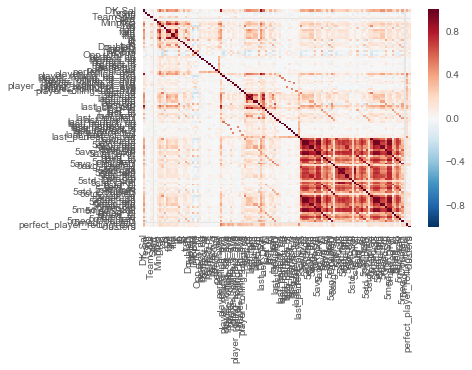

In [300]:
sns.heatmap(nba2017_20s.corr())

In [251]:
X_train, X_test, y_train, y_test = \
    train_test_split(nba2017_20s[[

        
'DK Sal',
'perfect_player_rolling_avg',



]],
                    nba2017_20s['perfect_player'],test_size=0.25,
                    random_state=42)

In [252]:
X_test.shape

(368, 2)

In [253]:
y_test.value_counts().sort_values().head()

1     35
0    333
Name: perfect_player, dtype: int64

In [254]:
from sklearn.pipeline import Pipeline,make_pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, StandardScaler

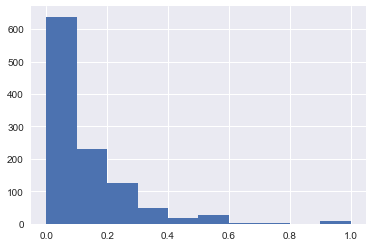

In [259]:
X_train['perfect_player_rolling_avg'].hist()

In [260]:
params = {}
gs = GridSearchCV(RandomForestRegressor(), param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-0.288061014643
{}


In [261]:
# r_score true values vs. mean baseline for r2 is 0
# calculate baseline 

# nba2017strip['DKP'].mean.value_counts()

In [262]:
from sklearn.metrics import classification_report, confusion_matrix

In [263]:
y_pred = gs.predict(X_test)

In [264]:
test = X_test

In [265]:
X_test.head()

,DK Sal,perfect_player_rolling_avg
4051,8200,0.222222
5515,5600,0.000000
427,4200,0.066667
4532,7100,0.000000
3028,10500,0.000000


In [266]:
nba2017_20s[227::]

,GID,Date,Name,DK Sal,Team,Opp,Team_pts,Start,H/A,Minutes,...,5med_rb,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,perfect_player_rolling_avg
2971,4112,2017-10-24,Robin Lopez,5800,25,4,112.0,1,0,30.116667,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
2976,4810,2017-10-24,Rondae Hollis-Jefferson,5200,29,20,121.0,1,0,24.600000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2987,4921,2017-10-24,Domantas Sabonis,4600,23,8,130.0,1,0,25.366667,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
3000,4172,2017-10-24,Blake Griffin,9000,17,5,102.0,1,1,36.716667,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
2998,4701,2017-10-24,Joe Ingles,4700,5,17,84.0,1,0,18.183333,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2996,4704,2017-10-24,Andrew Wiggins,6900,8,23,107.0,1,1,30.816667,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
2993,4620,2017-10-24,Rudy Gobert,7600,5,17,84.0,1,0,31.283333,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2990,4107,2017-10-24,DeAndre Jordan,7000,17,5,102.0,1,1,36.900000,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2988,4627,2017-10-24,Victor Oladipo,7200,23,8,130.0,1,0,28.383333,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
3038,4078,2017-10-24,D.J. Augustin,5100,20,29,125.0,1,1,28.966667,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.333333


In [267]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')

-0.29842490643941688

In [268]:
test['DKP Pred'] = y_pred

In [269]:
test[['DKP Pred']].to_csv('submission15.csv', index=False)

In [270]:
# nba2017strip.to_csv('nba2107strip.csv', index=False)


In [271]:
check = pd.DataFrame(list(zip(y_pred,y_test, (y_test-y_pred))))

In [274]:
check.sort_values(1, ascending=False)

,0,1,2
0,0.050000,1,0.950000
135,0.000000,1,1.000000
342,0.000000,1,1.000000
339,0.000000,1,1.000000
337,0.079368,1,0.920632
41,0.177336,1,0.822664
223,0.000000,1,1.000000
160,0.000000,1,1.000000
225,0.000000,1,1.000000
227,0.381667,1,0.618333


In [830]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [831]:
lm = linear_model.LinearRegression()

X = nba2017_20s[[

        
'DK Sal',    
'Opp',
'Team',
'Opp_DRPM',
'Start',
'H/A',
'DRPM',
'DK pos',
'player_rolling_pg_avg',
'player_rolling_sg_avg',
'player_rolling_sf_avg',
'player_rolling_pf_avg',
'player_rolling_c_avg',
'player_rolling_g_avg',
'player_rolling_f_avg',
'player_rolling_util_avg',
'5avg_pt',
'5avg_as',
'5avg_fga',
'5avg_fgm',
'5avg_fta',
'5avg_ftm',
'5avg_rb',
'5avg_DK_Sal',
'5avg_DKP',
'5avg_bl',
'5avg_st',
'5avg_to',
'5avg_trey',
'5avg_DoubleD',
'5avg_TripleD',
        
'5med_pt',
'5med_as',
'5med_fga',
'5med_fgm',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_bl',
'5med_st',
'5med_to',
'5med_trey',
'5med_DoubleD',
'5med_TripleD',
        
'5std_pt',
'5std_as',
'5std_fga',
'5std_fgm',
'5std_fta',
'5std_ftm',
'5std_rb',
'5std_DK_Sal',
'5std_DKP',
'5std_bl',
'5std_st',
'5std_to',
'5std_trey',
'5std_DoubleD',
'5std_TripleD'

]]
y = nba2017_20s['DKP']


model = lm.fit(X, y)

# K-Means and Clustering

In [275]:


%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

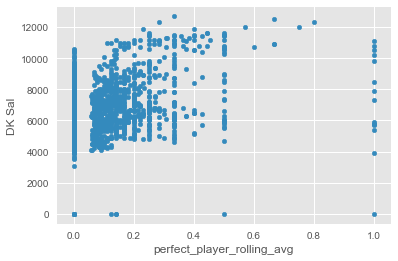

In [276]:
features = ['perfect_player_rolling_avg', 'DK Sal']
nba2017_20s[features].plot(kind='scatter', x=features[0], y=features[1])

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


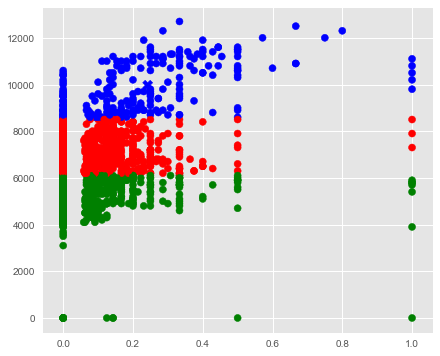

In [277]:
# 1. Run K-Means against our 2 features with 3 clusters
k = 3
model = KMeans(n_clusters=k)
model.fit(nba2017_20s[features].values)

# 2. Assign clusters back to our dataframe
nba2017_20s['clusters'] = model.labels_
cc = pd.DataFrame(model.cluster_centers_)

# 4. Plot the scatter of our points with calculated centroids
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# update x,y of our final clusters to plot later
fig, ax      =  plt.subplots(figsize=(7,6))

# Plot the scatter of our points with calculated centroids
ax.scatter(nba2017_20s[features[0]], nba2017_20s[features[1]], c=colors)
ax.scatter(cc[0], cc[1], marker='X', c=base_colors, s=100) # cc.index

In [278]:
print(model.n_iter_)
print(silhouette_score(nba2017_20s[features], nba2017_20s['clusters']))

4
0.565414514656


In [279]:
model = KMeans(n_clusters=3, random_state=0).fit(X)

NameError: name 'X' is not defined

In [280]:
predicted = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", predicted)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 1 1 ..., 0 0 2]
Location of centroids: 
[[  1.05773014e-01   7.17710049e+03]
 [  7.38402712e-02   5.11365031e+03]
 [  2.42172629e-01   9.96807512e+03]]


In [281]:
# from sklearn.preprocessing import StandardScaler



# ss = StandardScaler()
# nba2017_20s[features] = ss.fit_transform(nba2017_20s[features])

# k = 3
# model = KMeans(n_clusters=k)
# model.fit(nba2017_20s[features])

# nba2017_20s['clusters'] = model.labels_


# cc = pd.DataFrame(model.cluster_centers_)

# base_colors  =  ['r', 'g', 'b']
# colors       =  [base_colors[centroid] for centroid in model.labels_]

# # update x,y of our final clusters to plot later
# fig, ax      =  plt.subplots(figsize=(7,6))

# # Plot the scatter of our points with calculated centroids
# ax.scatter(nba2017_20s[features[0]], nba2017_20s[features[1]], c=colors)
# ax.scatter(cc[0], cc[1], marker='X', c=base_colors, s=100) # cc.index

In [282]:

predicted = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", predicted)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 1 1 ..., 0 0 2]
Location of centroids: 
[[  1.05773014e-01   7.17710049e+03]
 [  7.38402712e-02   5.11365031e+03]
 [  2.42172629e-01   9.96807512e+03]]


In [286]:

X_train, X_test, y_train, y_test = \
    train_test_split(nba2017_20s[[

        
'DK Sal',
'perfect_player_rolling_avg',       
'clusters'    


]],
                    nba2017_20s['perfect_player'],test_size=0.25,
                    random_state=42)

In [287]:
X_test.shape


(368, 3)

In [288]:
y_test.value_counts().sort_values().head()

1     35
0    333
Name: perfect_player, dtype: int64

In [289]:
params = {}
gs = GridSearchCV(RandomForestRegressor(), param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-0.318288329529
{}


In [290]:

y_pred = gs.predict(X_test)

In [291]:
test = X_test

In [292]:
X_test.head()

,DK Sal,perfect_player_rolling_avg,clusters
4051,8200,0.222222,0
5515,5600,0.000000,1
427,4200,0.066667,1
4532,7100,0.000000,0
3028,10500,0.000000,2


In [293]:
test['DKP Pred'] = y_pred

In [294]:
check = pd.DataFrame(list(zip(y_pred,y_test, (y_test-y_pred))))

In [297]:
check.sort_values(1, ascending=False)

,0,1,2
0,0.000000,1,1.000000
135,0.000000,1,1.000000
342,0.000000,1,1.000000
339,0.000000,1,1.000000
337,0.180849,1,0.819151
41,0.168780,1,0.831220
223,0.006667,1,0.993333
160,0.000000,1,1.000000
225,0.000000,1,1.000000
227,0.516667,1,0.483333


In [298]:
corr_csv = nba2017_20s.corr().to_csv('corr.csv', index=True)

# PCA


In [490]:
demo_noage = nba2017_20s[[

        
'DK Sal',
'Opp',
'Team',
'Opp_DRPM',
'Start',
'H/A',
'DRPM',
'DK pos',
'player_rolling_pg_avg',
'player_rolling_sg_avg',
'player_rolling_sf_avg',
'player_rolling_pf_avg',
'player_rolling_c_avg',
'player_rolling_g_avg',
'player_rolling_f_avg',
'player_rolling_util_avg',
'5avg_pt',
'5avg_as',
'5avg_fga',
'5avg_fgm',
'5avg_fta',
'5avg_ftm',
'5avg_rb',
'5avg_DK_Sal',
'5avg_DKP',
'5avg_bl',
'5avg_st',
'5avg_to',
'5avg_trey',
'5avg_DoubleD',
'5avg_TripleD',
        
'5med_pt',
'5med_as',
'5med_fga',
'5med_fgm',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_bl',
'5med_st',
'5med_to',
'5med_trey',
'5med_DoubleD',
'5med_TripleD',
        
'5std_pt',
'5std_as',
'5std_fga',
'5std_fgm',
'5std_fta',
'5std_ftm',
'5std_rb',
'5std_DK_Sal',
'5std_DKP',
'5std_bl',
'5std_st',
'5std_to',
'5std_trey',
'5std_DoubleD',
'5std_TripleD'

]]
demo_noage = (demo_noage - nba2017_20s.mean()) / nba2017_20s.std()

In [491]:
demo_noage_corr = np.corrcoef(demo_noage.values.T)
d2 = demo_noage.corr().fillna(0)
d2

,5avg_DKP,5avg_DK_Sal,5avg_DoubleD,5avg_TripleD,5avg_as,5avg_bl,5avg_fga,5avg_fgm,5avg_fta,5avg_ftm,...,player_rolling_pf_avg,player_rolling_pg_avg,player_rolling_sf_avg,player_rolling_sg_avg,player_rolling_util_avg,pt,rb,st,to,trey
5avg_DKP,1.000000,0.960730,0.614923,0.257622,0.738057,0.552594,0.928937,0.946125,0.812810,0.801706,...,-0.008635,0.038959,0.053400,-0.018185,0.104416,0.0,0.0,0.0,0.0,0.0
5avg_DK_Sal,0.960730,1.000000,0.563786,0.237574,0.729083,0.533074,0.910717,0.910099,0.794885,0.781037,...,-0.024450,0.035191,0.036057,-0.033259,0.088864,0.0,0.0,0.0,0.0,0.0
5avg_DoubleD,0.614923,0.563786,1.000000,0.301073,0.363182,0.534308,0.395729,0.472634,0.506893,0.457209,...,0.060705,0.034680,0.017893,-0.095779,0.198915,0.0,0.0,0.0,0.0,0.0
5avg_TripleD,0.257622,0.237574,0.301073,1.000000,0.407704,0.026281,0.187588,0.182336,0.211799,0.203134,...,0.023666,0.121942,0.068775,-0.032234,0.012032,0.0,0.0,0.0,0.0,0.0
5avg_as,0.738057,0.729083,0.363182,0.407704,1.000000,0.154082,0.682492,0.636464,0.601574,0.623652,...,-0.062363,0.185165,0.060485,0.004977,-0.006647,0.0,0.0,0.0,0.0,0.0
5avg_bl,0.552594,0.533074,0.534308,0.026281,0.154082,1.000000,0.396353,0.483549,0.434128,0.383513,...,0.029810,-0.076904,0.018575,-0.113309,0.232772,0.0,0.0,0.0,0.0,0.0
5avg_fga,0.928937,0.910717,0.395729,0.187588,0.682492,0.396353,1.000000,0.965560,0.766707,0.771889,...,-0.029300,0.039359,0.065391,0.020874,0.068646,0.0,0.0,0.0,0.0,0.0
5avg_fgm,0.946125,0.910099,0.472634,0.182336,0.636464,0.483549,0.965560,1.000000,0.750817,0.748792,...,-0.002381,0.030503,0.088530,0.006197,0.093064,0.0,0.0,0.0,0.0,0.0
5avg_fta,0.812810,0.794885,0.506893,0.211799,0.601574,0.434128,0.766707,0.750817,1.000000,0.971726,...,-0.026677,0.064615,0.027425,-0.013389,0.117003,0.0,0.0,0.0,0.0,0.0
5avg_ftm,0.801706,0.781037,0.457209,0.203134,0.623652,0.383513,0.771889,0.748792,0.971726,1.000000,...,-0.023226,0.077448,0.032227,-0.006672,0.120248,0.0,0.0,0.0,0.0,0.0


In [492]:
from sklearn.decomposition import PCA

X = d2

pca = PCA()
pca = pca.fit(X)

print(pca.explained_variance_)
print(pca.components_)

[  3.49622779e+00   2.14139084e-01   7.74454901e-02   3.57910562e-02
   2.90015884e-02   2.02999367e-02   1.50820790e-02   1.38076418e-02
   1.22183442e-02   1.15094385e-02   1.06823774e-02   9.78080175e-03
   9.00568111e-03   8.55030985e-03   7.74351183e-03   7.24931026e-03
   6.85205833e-03   6.14047977e-03   5.72392390e-03   5.60729843e-03
   5.19579827e-03   3.90365082e-03   3.00096879e-03   2.61030378e-03
   2.39928859e-03   1.97223387e-03   1.63709294e-03   1.45723144e-03
   1.29005154e-03   8.99782587e-04   6.59698290e-04   5.71686963e-04
   4.65499141e-04   3.72695644e-04   3.39861116e-04   2.05822633e-04
   7.01736009e-05   5.06619805e-05   3.66020097e-05   3.16684154e-05
   2.64299771e-05   2.19329780e-05   2.11600548e-05   1.55501497e-05
   1.33438438e-05   1.17860010e-05   8.81515330e-06   7.75709485e-06
   4.98761337e-06   4.39096119e-06   2.91433542e-06   2.05601049e-06
   1.93787194e-06   1.43078134e-06   6.35797377e-07   4.67363482e-07
   1.45972250e-09   3.83534914e-31

In [493]:

var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [  8.67512741e-01   5.31339474e-02   1.92164108e-02   8.88077069e-03
   7.19611221e-03   5.03698694e-03   3.74228925e-03   3.42606545e-03
   3.03171587e-03   2.85581637e-03   2.65059917e-03   2.42689283e-03
   2.23456353e-03   2.12157307e-03   1.92138373e-03   1.79875838e-03
   1.70018897e-03   1.52362625e-03   1.42026699e-03   1.39132892e-03
   1.28922412e-03   9.68605890e-04   7.44625013e-04   6.47690002e-04
   5.95331181e-04   4.89366858e-04   4.06208940e-04   3.61580228e-04
   3.20098179e-04   2.23261442e-04   1.63689756e-04   1.41851662e-04
   1.15503468e-04   9.24763029e-05   8.43291301e-05   5.10704015e-05
   1.74120500e-05   1.25706665e-05   9.08199115e-06   7.85782722e-06
   6.55802290e-06   5.44219056e-06   5.25040652e-06   3.85843082e-06
   3.31098408e-06   2.92443933e-06   2.18728820e-06   1.92475406e-06
   1.23756758e-06   1.08952134e-06   7.23128829e-07   5.10154201e-07
   4.80840695e-07   3.55017212e-07   1.57759265e-07   1.15966064e-07
  

NameError: name 'lr' is not defined

# Feature Selection

In [343]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [345]:
nba2017_20s.corr()

,DK Sal,Team,Opp,Start,H/A,Minutes,DKP,as,bl,fga,...,5med_rb,5med_DK_Sal,5med_DKP,5med_bl,5med_st,5med_to,5med_trey,5med_DoubleD,5med_TripleD,clusters
DK Sal,1.000000,-0.124686,-0.005522,NaN,-0.013232,0.334946,0.581023,0.400051,0.193358,0.492672,...,0.256043,0.407860,0.414537,0.264850,0.135495,0.361311,0.137333,0.411223,NaN,0.408356
Team,-0.124686,1.000000,-0.028393,NaN,0.000282,-0.057977,-0.049497,-0.026438,-0.065703,0.000966,...,-0.055160,-0.033214,-0.016982,-0.068281,-0.029838,-0.096567,-0.003150,-0.188910,NaN,-0.046006
Opp,-0.005522,-0.028393,1.000000,NaN,0.028778,-0.021944,0.010981,0.022893,0.010778,0.002504,...,-0.002524,-0.011876,-0.008157,-0.001568,0.007223,-0.002760,0.001044,-0.015862,NaN,-0.028778
Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H/A,-0.013232,0.000282,0.028778,NaN,1.000000,-0.000195,0.038727,0.031308,0.081816,-0.016291,...,0.017912,-0.004189,-0.000092,0.025548,0.004473,-0.007539,-0.002228,0.009493,NaN,0.019532
Minutes,0.334946,-0.057977,-0.021944,NaN,-0.000195,1.000000,0.597362,0.311233,0.113587,0.609929,...,0.010805,0.136083,0.132646,0.004929,0.137575,0.121447,0.132656,0.072305,NaN,0.313113
DKP,0.581023,-0.049497,0.010981,NaN,0.038727,0.597362,1.000000,0.477674,0.327157,0.695503,...,0.155590,0.243081,0.239451,0.155007,0.080918,0.231886,0.070583,0.229452,NaN,0.670949
as,0.400051,-0.026438,0.022893,NaN,0.031308,0.311233,0.477674,1.000000,-0.057448,0.283898,...,-0.069065,0.178406,0.166533,-0.092119,0.128240,0.257841,0.119074,0.057901,NaN,0.289025
bl,0.193358,-0.065703,0.010778,NaN,0.081816,0.113587,0.327157,-0.057448,1.000000,0.081121,...,0.181989,0.076492,0.069226,0.341417,-0.087600,0.030520,-0.135777,0.198803,NaN,0.287364
fga,0.492672,0.000966,0.002504,NaN,-0.016291,0.609929,0.695503,0.283898,0.081121,1.000000,...,-0.041502,0.205425,0.195868,0.001489,0.092806,0.206139,0.188144,0.045207,NaN,0.393122
